In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

### Exploratory Data Analysis

In [5]:
df = pd.read_csv("/Users/beulahdivya/Downloads/Final Project - ISE 535/airbnb_df.csv")

In [7]:
df.head(5)

listing_id       property_type  number_of_bedrooms  guest_capacity  \
0      100822  Standard Apartment                   2               4   
1      100908  Standard Apartment                   2               3   
2      101850  Standard Apartment                   1               2   
3      102385  Standard Apartment                   2               2   
4      103827         Luxury Home                   4               4   

   location_score  review_score  amenities_count host_response_time    season  \
0           75.17          4.87                8     within an hour      peak   
1           67.07          4.06                6          >24 hours  off-peak   
2           76.57          4.16               10           same day  off-peak   
3           88.14          3.74               11           same day  shoulder   
4           58.63          3.37               15           same day      peak   

   minimum_stay_nights  years_as_host  cleaning_fee cancellation_policy  \
0                    2            1.6         21.43            flexible   
1                    2            4.1         38.30            flexible   
2                    1            2.3         50.34            flexible   
3                    2            1.6         35.37              strict   
4                    4            0.9         94.90              strict   

   nightly_rate  
0        187.29  
1        255.64  
2         62.82  
3        203.80  
4       1000.00

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           3982 non-null   int64  
 1   property_type        3982 non-null   object 
 2   number_of_bedrooms   3982 non-null   int64  
 3   guest_capacity       3982 non-null   int64  
 4   location_score       3982 non-null   float64
 5   review_score         3982 non-null   float64
 6   amenities_count      3982 non-null   int64  
 7   host_response_time   3982 non-null   object 
 8   season               3982 non-null   object 
 9   minimum_stay_nights  3982 non-null   int64  
 10  years_as_host        3982 non-null   float64
 11  cleaning_fee         3982 non-null   float64
 12  cancellation_policy  3982 non-null   object 
 13  nightly_rate         3982 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 435.7+ KB


In [13]:
df.columns

Index(['listing_id', 'property_type', 'number_of_bedrooms', 'guest_capacity',
       'location_score', 'review_score', 'amenities_count',
       'host_response_time', 'season', 'minimum_stay_nights', 'years_as_host',
       'cleaning_fee', 'cancellation_policy', 'nightly_rate'],
      dtype='object')

In [15]:
df.describe().transpose()

count           mean          std        min  \
listing_id           3982.0  101990.500000  1149.648714  100000.00   
number_of_bedrooms   3982.0       2.185836     1.373346       1.00   
guest_capacity       3982.0       3.182320     1.604411       1.00   
location_score       3982.0      70.315698    11.131437      33.33   
review_score         3982.0       4.003890     0.559780       1.99   
amenities_count      3982.0       7.943998     3.349540       3.00   
minimum_stay_nights  3982.0       2.272476     1.236366       1.00   
years_as_host        3982.0       3.003943     2.979756       0.00   
cleaning_fee         3982.0      36.306449    19.792305      -4.83   
nightly_rate         3982.0     180.307187   120.990889      30.00   

                             25%        50%          75%        max  
listing_id           100995.2500  101990.50  102985.7500  103981.00  
number_of_bedrooms        1.0000       2.00       3.0000       5.00  
guest_capacity            2.0000       3.00       4.0000       7.00  
location_score           62.7500      70.43      77.7800     107.26  
review_score              3.6300       4.01       4.3900       5.00  
amenities_count           5.0000       8.00      10.0000      20.00  
minimum_stay_nights       1.0000       2.00       3.0000       5.00  
years_as_host             0.9000       2.10       4.1000      22.90  
cleaning_fee             20.5625      32.67      48.7050     111.10  
nightly_rate             99.3000     147.25     226.0475    1000.00

#### Missing Values

In [18]:
df.isnull().sum()

listing_id             0
property_type          0
number_of_bedrooms     0
guest_capacity         0
location_score         0
review_score           0
amenities_count        0
host_response_time     0
season                 0
minimum_stay_nights    0
years_as_host          0
cleaning_fee           0
cancellation_policy    0
nightly_rate           0
dtype: int64

#### Data Types

In [21]:
# Print data types
print("Data Types Summary:\n")
print(df.dtypes)

# List categorical columns (object dtype)
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Variables (to be encoded):")
for col in categorical_columns:
    print("-", col)


Data Types Summary:

listing_id               int64
property_type           object
number_of_bedrooms       int64
guest_capacity           int64
location_score         float64
review_score           float64
amenities_count          int64
host_response_time      object
season                  object
minimum_stay_nights      int64
years_as_host          float64
cleaning_fee           float64
cancellation_policy     object
nightly_rate           float64
dtype: object

Categorical Variables (to be encoded):
- property_type
- host_response_time
- season
- cancellation_policy


In [23]:
import pandas as pd

# Basic summary
num_summary = df.describe().T

# Add skew and kurtosis
num_summary['skew'] = df.skew(numeric_only=True)
num_summary['kurtosis'] = df.kurtosis(numeric_only=True)

# Display selected columns
print("\nNumerical Summary Table (with Skew & Kurtosis):")
display(num_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis']])


Numerical Summary Table (with Skew & Kurtosis):


count           mean          std        min  \
listing_id           3982.0  101990.500000  1149.648714  100000.00   
number_of_bedrooms   3982.0       2.185836     1.373346       1.00   
guest_capacity       3982.0       3.182320     1.604411       1.00   
location_score       3982.0      70.315698    11.131437      33.33   
review_score         3982.0       4.003890     0.559780       1.99   
amenities_count      3982.0       7.943998     3.349540       3.00   
minimum_stay_nights  3982.0       2.272476     1.236366       1.00   
years_as_host        3982.0       3.003943     2.979756       0.00   
cleaning_fee         3982.0      36.306449    19.792305      -4.83   
nightly_rate         3982.0     180.307187   120.990889      30.00   

                             25%        50%          75%        max      skew  \
listing_id           100995.2500  101990.50  102985.7500  103981.00  0.000000   
number_of_bedrooms        1.0000       2.00       3.0000       5.00  0.903153   
guest_capacity            2.0000       3.00       4.0000       7.00  0.581191   
location_score           62.7500      70.43      77.7800     107.26 -0.020977   
review_score              3.6300       4.01       4.3900       5.00 -0.165083   
amenities_count           5.0000       8.00      10.0000      20.00  0.504965   
minimum_stay_nights       1.0000       2.00       3.0000       5.00  0.688846   
years_as_host             0.9000       2.10       4.1000      22.90  1.943478   
cleaning_fee             20.5625      32.67      48.7050     111.10  0.680534   
nightly_rate             99.3000     147.25     226.0475    1000.00  2.116051   

                     kurtosis  
listing_id          -1.200000  
number_of_bedrooms  -0.522106  
guest_capacity      -0.412250  
location_score      -0.037316  
review_score        -0.344612  
amenities_count     -0.123790  
minimum_stay_nights -0.464123  
years_as_host        5.139720  
cleaning_fee        -0.182132  
nightly_rate         7.120920

In [25]:
# Summary for categorical columns
print("\nCategorical Variables Summary:\n")
for col in categorical_columns:
    top_val = df[col].mode()[0]
    freq = df[col].value_counts().iloc[0]
    print(f"{col:25} | Count: {df[col].count():4} | Unique: {df[col].nunique():2} | Top: {top_val:15} | Freq: {freq}")


Categorical Variables Summary:

property_type             | Count: 3982 | Unique:  3 | Top: Standard Apartment | Freq: 1988
host_response_time        | Count: 3982 | Unique:  3 | Top: within an hour  | Freq: 1979
season                    | Count: 3982 | Unique:  3 | Top: peak            | Freq: 1607
cancellation_policy       | Count: 3982 | Unique:  3 | Top: flexible        | Freq: 1998


### UNIVARIATE ANALYSIS 

#### Histograms of Numerical Variables

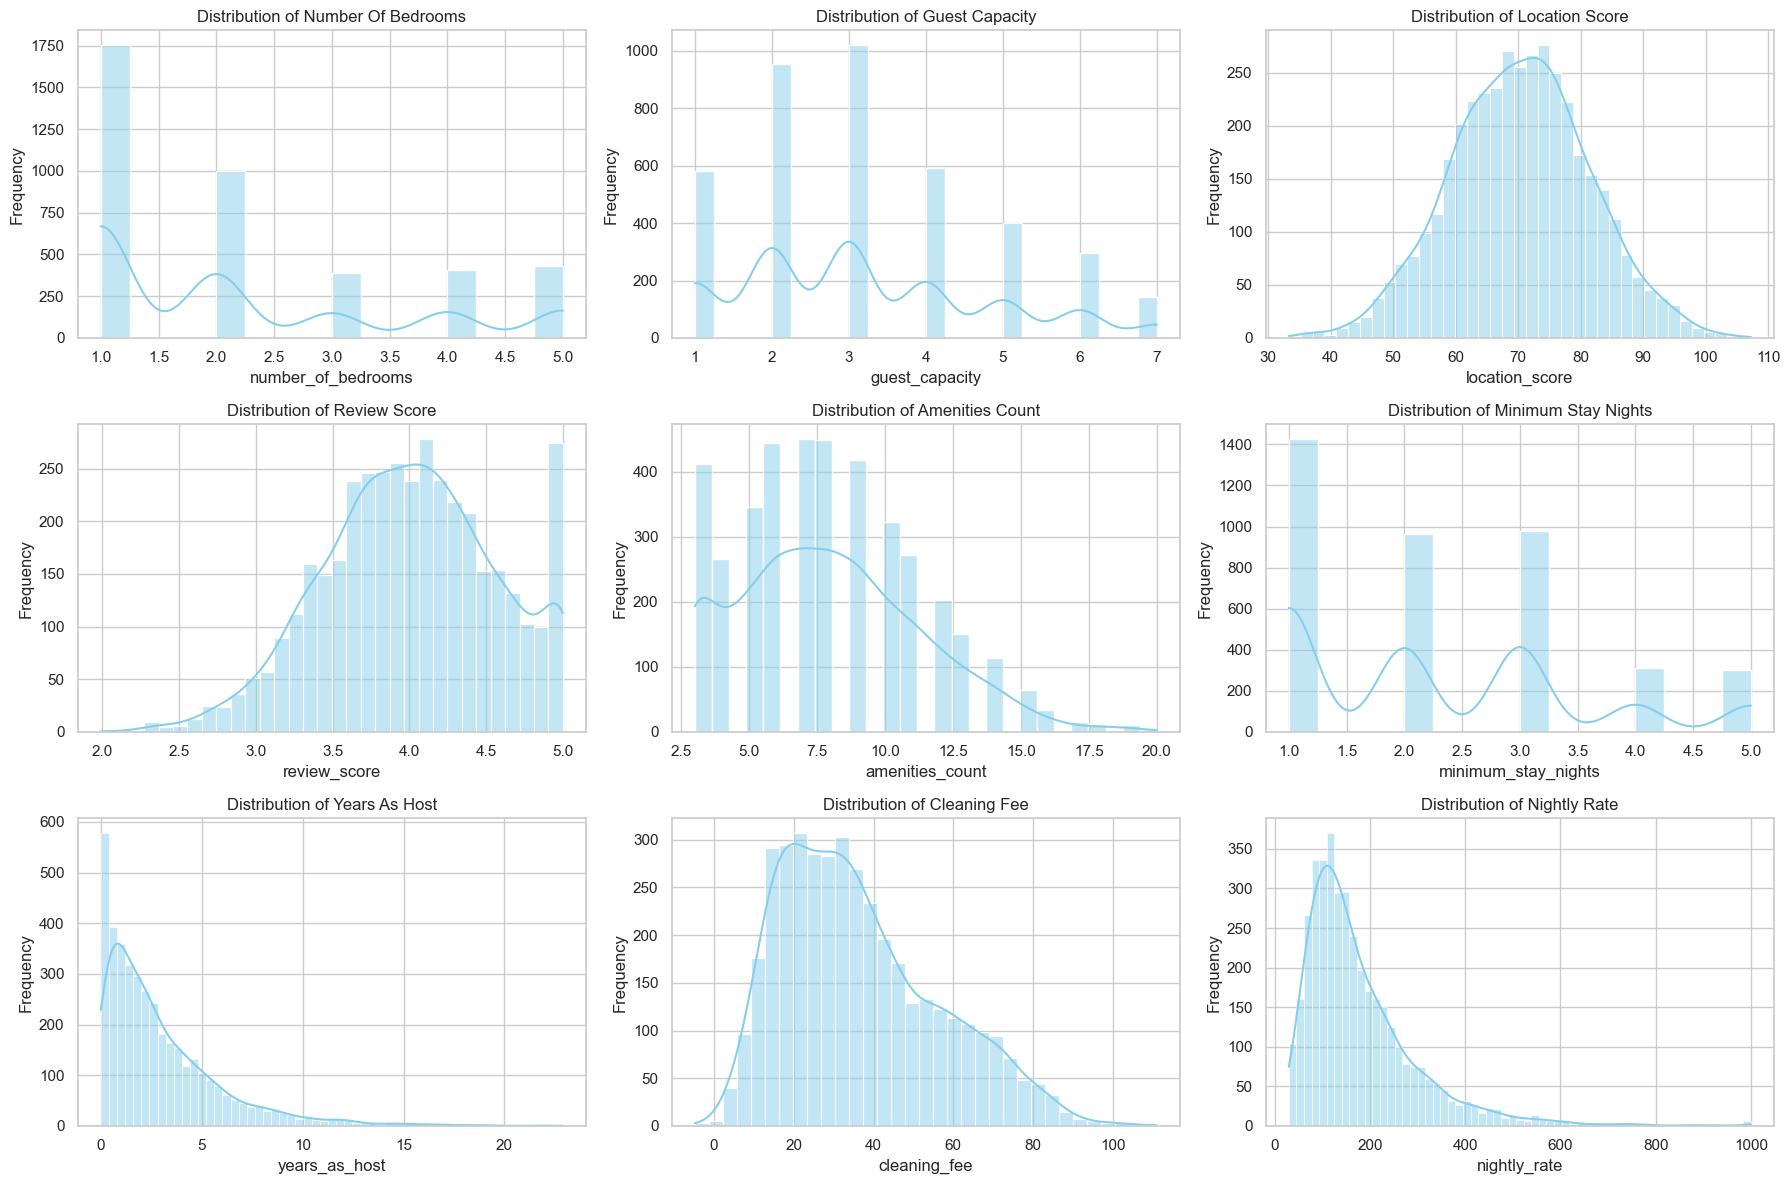

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="Set2")

# Numerical columns
num_cols = ['number_of_bedrooms', 'guest_capacity', 'location_score', 'review_score',
            'amenities_count', 'minimum_stay_nights', 'years_as_host', 'cleaning_fee', 'nightly_rate']

# Plot 3x3 grid of histograms
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {col.replace('_',' ').title()}")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Countplots of Categorical variables 


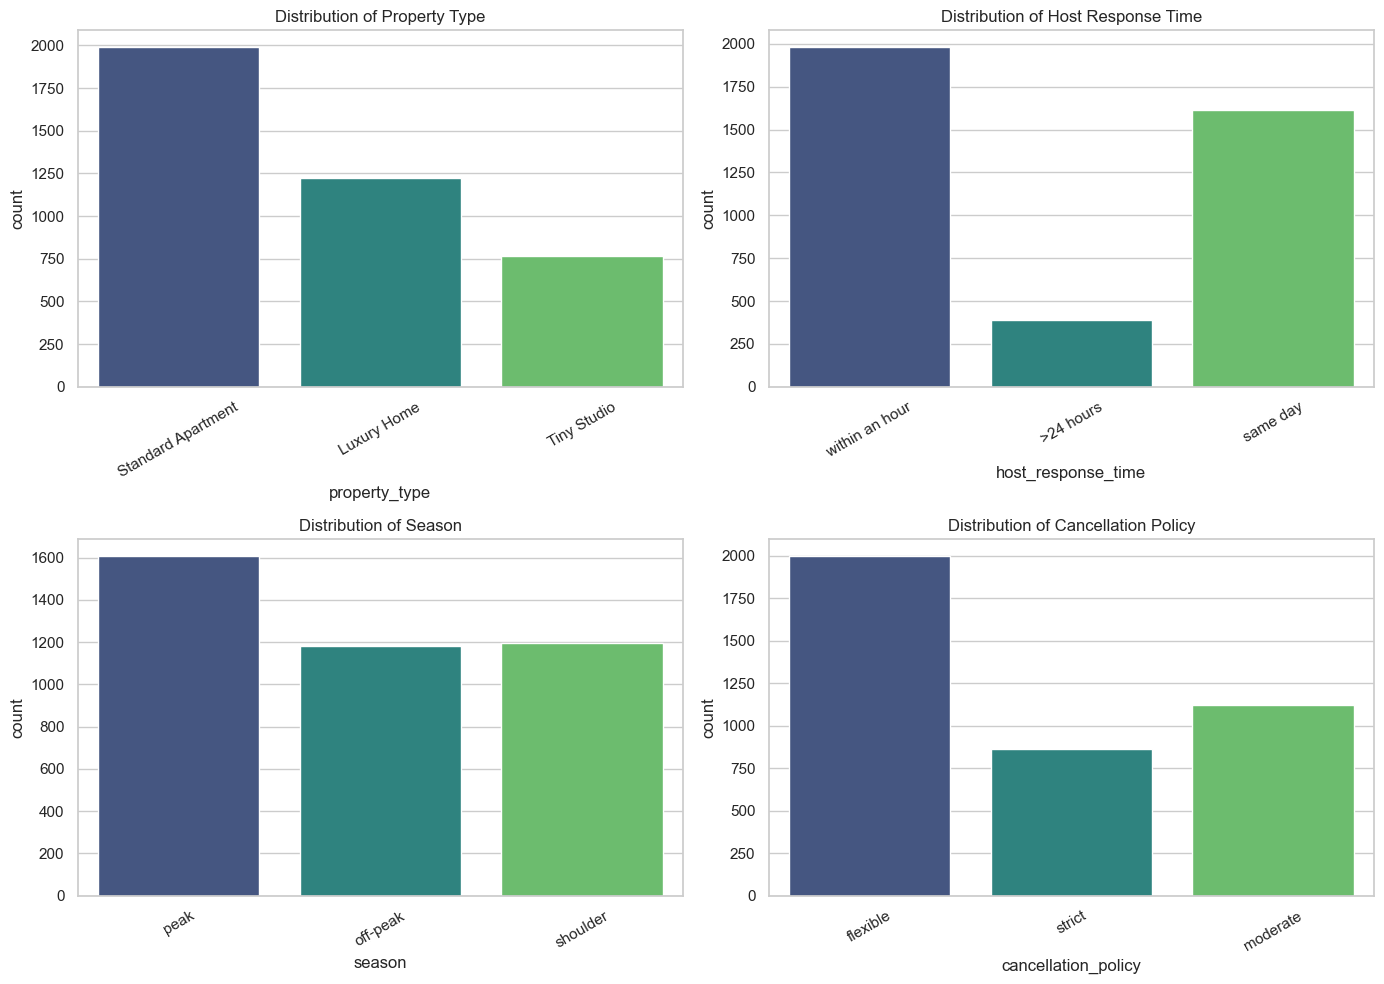

In [35]:
cat_cols = ['property_type', 'host_response_time', 'season', 'cancellation_policy']

# Plot 2x2 bar plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', hue = col, legend = False)
    axes[i].set_title(f"Distribution of {col.replace('_',' ').title()}")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


In [37]:
from scipy.stats import kurtosis, skew

# Choose a group: e.g., Pricing Features
pricing_features = ['nightly_rate', 'cleaning_fee']

summary_stats = df[pricing_features].agg(['mean', 'std', 'min', 'max']).T
summary_stats['skew'] = df[pricing_features].skew()
summary_stats['kurtosis'] = df[pricing_features].kurtosis()

print("Pricing Feature Summary:\n")
display(summary_stats.round(2))


Pricing Feature Summary:



mean     std    min     max  skew  kurtosis
nightly_rate  180.31  120.99  30.00  1000.0  2.12      7.12
cleaning_fee   36.31   19.79  -4.83   111.1  0.68     -0.18

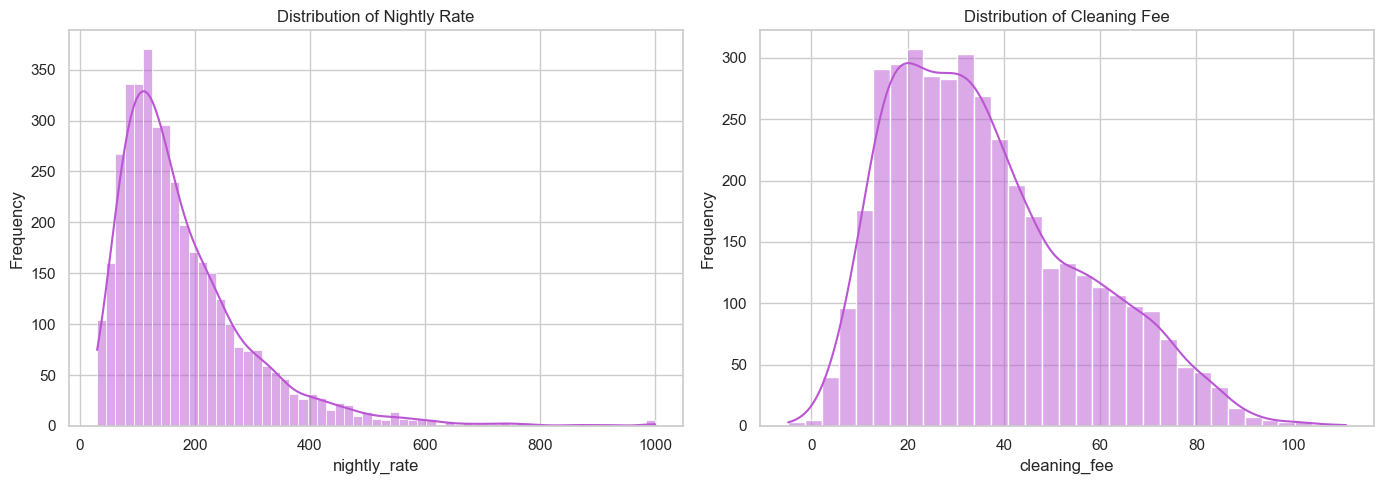

In [39]:
# Plot histograms for pricing group
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, col in enumerate(pricing_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='mediumorchid')
    axes[i].set_title(f"Distribution of {col.replace('_',' ').title()}")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

sns.set(style='whitegrid', palette='Set2')


#### statistics Summary along with their distributions 

In [44]:
def summarize_and_plot(group_name, cols):
    print(f"\n {group_name} — Statistical Summary:\n")
    df_summary = df[cols].agg(['mean', 'std', 'min', 'max']).T
    df_summary['skew'] = df[cols].skew()
    df_summary['kurtosis'] = df[cols].kurtosis()
    display(df_summary.round(2))

    # Plot histograms
    n = len(cols)
    ncols = 2 if n > 1 else 1
    nrows = (n + 1) // 2
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color='mediumpurple')
        axes[i].set_title(f"{col.replace('_', ' ').title()}")
        axes[i].set_ylabel("Frequency")

    plt.suptitle(f"{group_name} – Distributions", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()



 Identifiers & Listing Context — Statistical Summary:



mean      std       min       max  skew  kurtosis
listing_id  101990.5  1149.65  100000.0  103981.0   0.0      -1.2

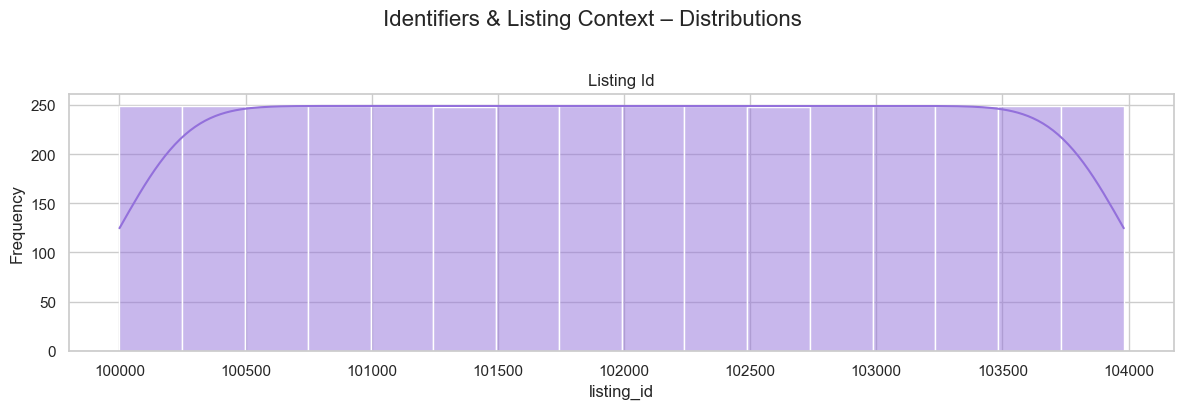


 Host Information — Statistical Summary:



mean   std  min   max  skew  kurtosis
years_as_host   3.0  2.98  0.0  22.9  1.94      5.14

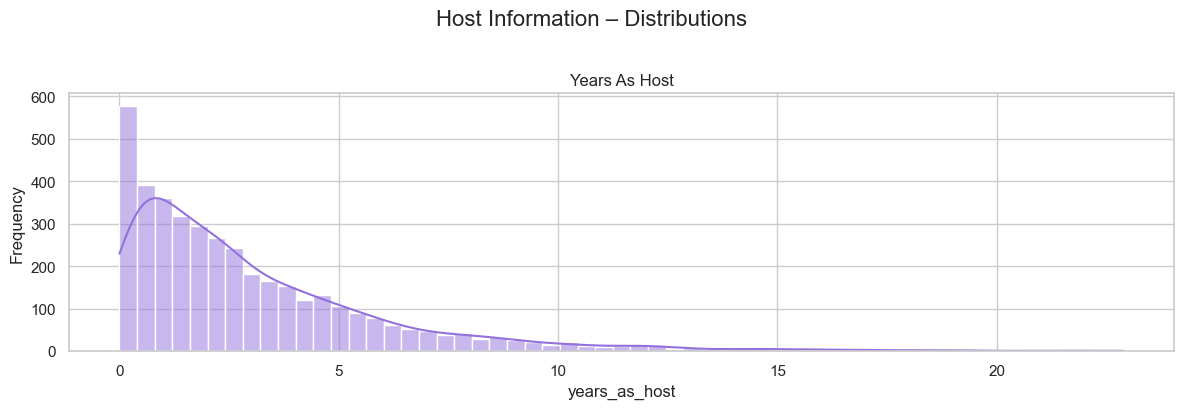


 Guest Capacity & Property Features — Statistical Summary:



mean   std  min   max  skew  kurtosis
number_of_bedrooms   2.19  1.37  1.0   5.0  0.90     -0.52
guest_capacity       3.18  1.60  1.0   7.0  0.58     -0.41
amenities_count      7.94  3.35  3.0  20.0  0.50     -0.12
minimum_stay_nights  2.27  1.24  1.0   5.0  0.69     -0.46

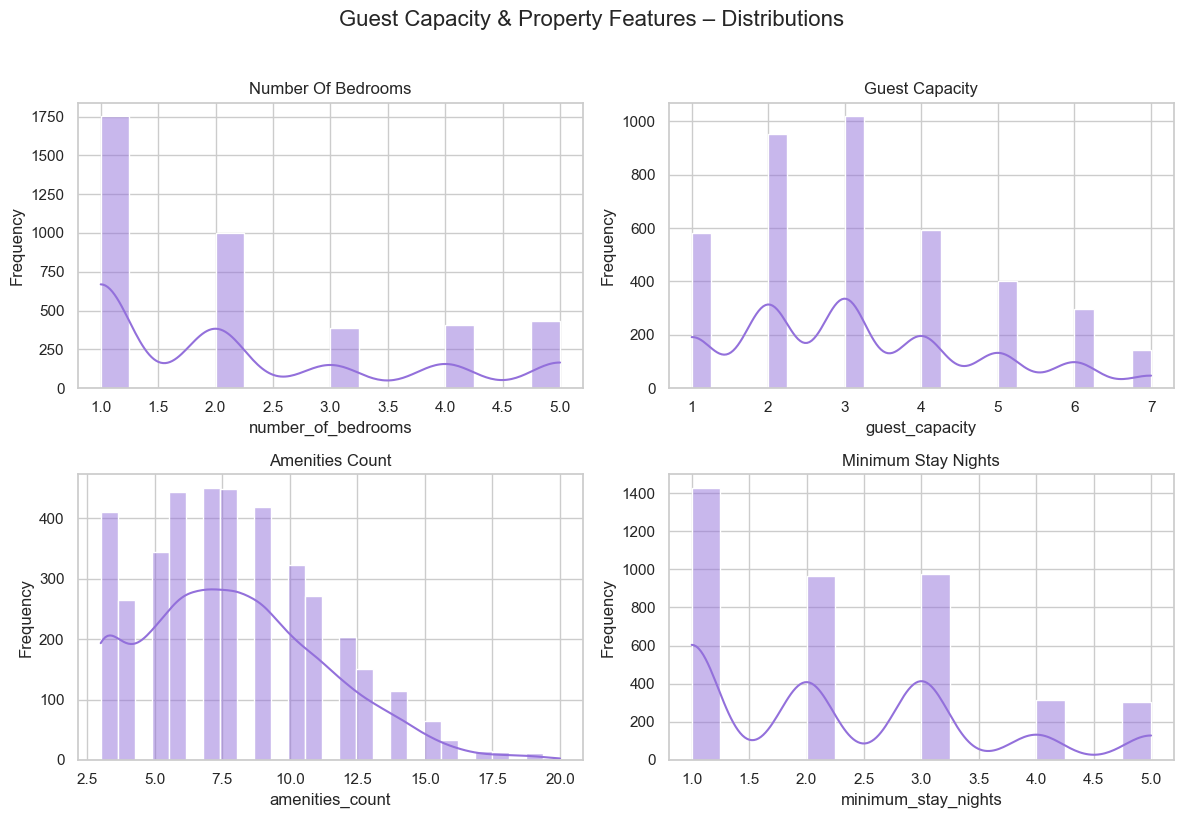


 Scores & Reviews — Statistical Summary:



mean    std    min     max  skew  kurtosis
review_score     4.00   0.56   1.99    5.00 -0.17     -0.34
location_score  70.32  11.13  33.33  107.26 -0.02     -0.04

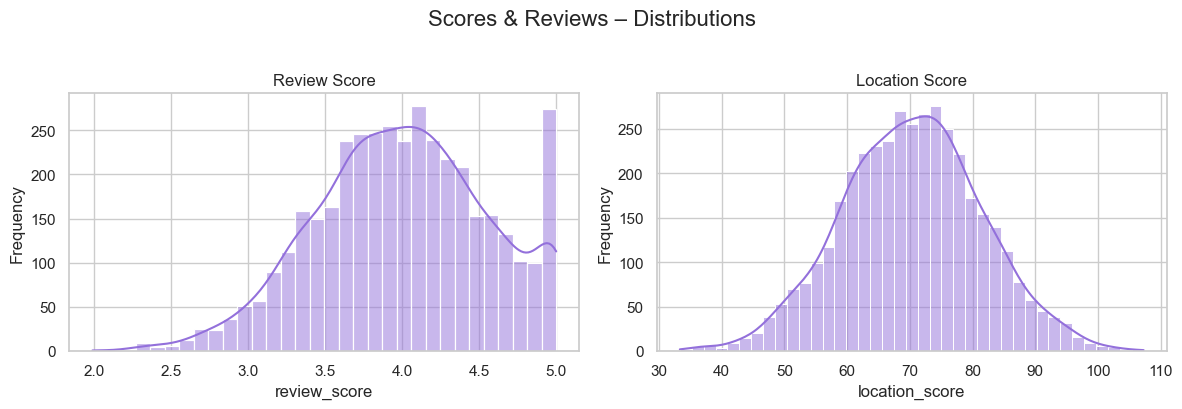


 Pricing — Statistical Summary:



mean     std    min     max  skew  kurtosis
nightly_rate  180.31  120.99  30.00  1000.0  2.12      7.12
cleaning_fee   36.31   19.79  -4.83   111.1  0.68     -0.18

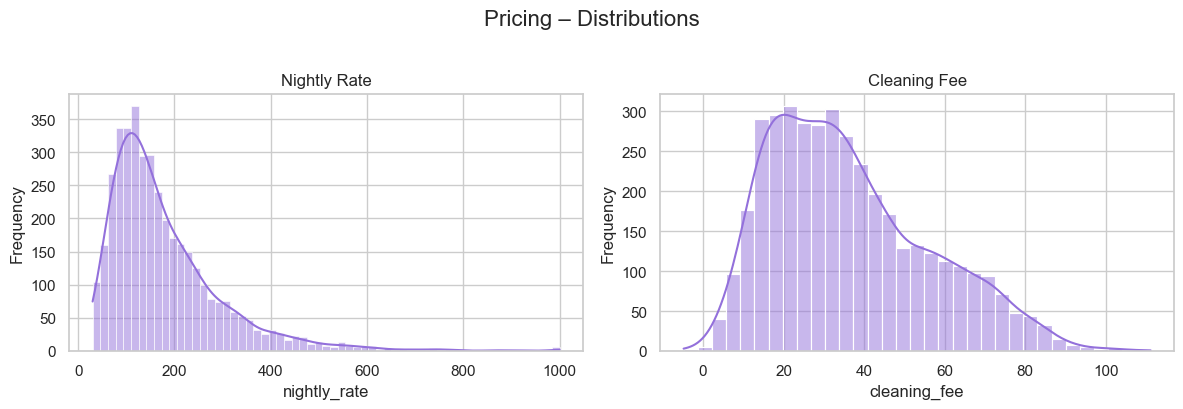

In [46]:
# Group 1: Identifiers & Listing Context
summarize_and_plot("Identifiers & Listing Context", ['listing_id'])  # Mostly ID-based, optional to skip visual

# Group 2: Host Information
summarize_and_plot("Host Information", ['years_as_host'])

# Group 3: Guest Capacity & Property Features
summarize_and_plot("Guest Capacity & Property Features", [
    'number_of_bedrooms', 'guest_capacity', 'amenities_count', 'minimum_stay_nights'
])

# Group 4: Scores & Reviews
summarize_and_plot("Scores & Reviews", ['review_score', 'location_score'])

# Group 5: Pricing
summarize_and_plot("Pricing", ['nightly_rate', 'cleaning_fee'])


#### Boxplot of Numerical features 

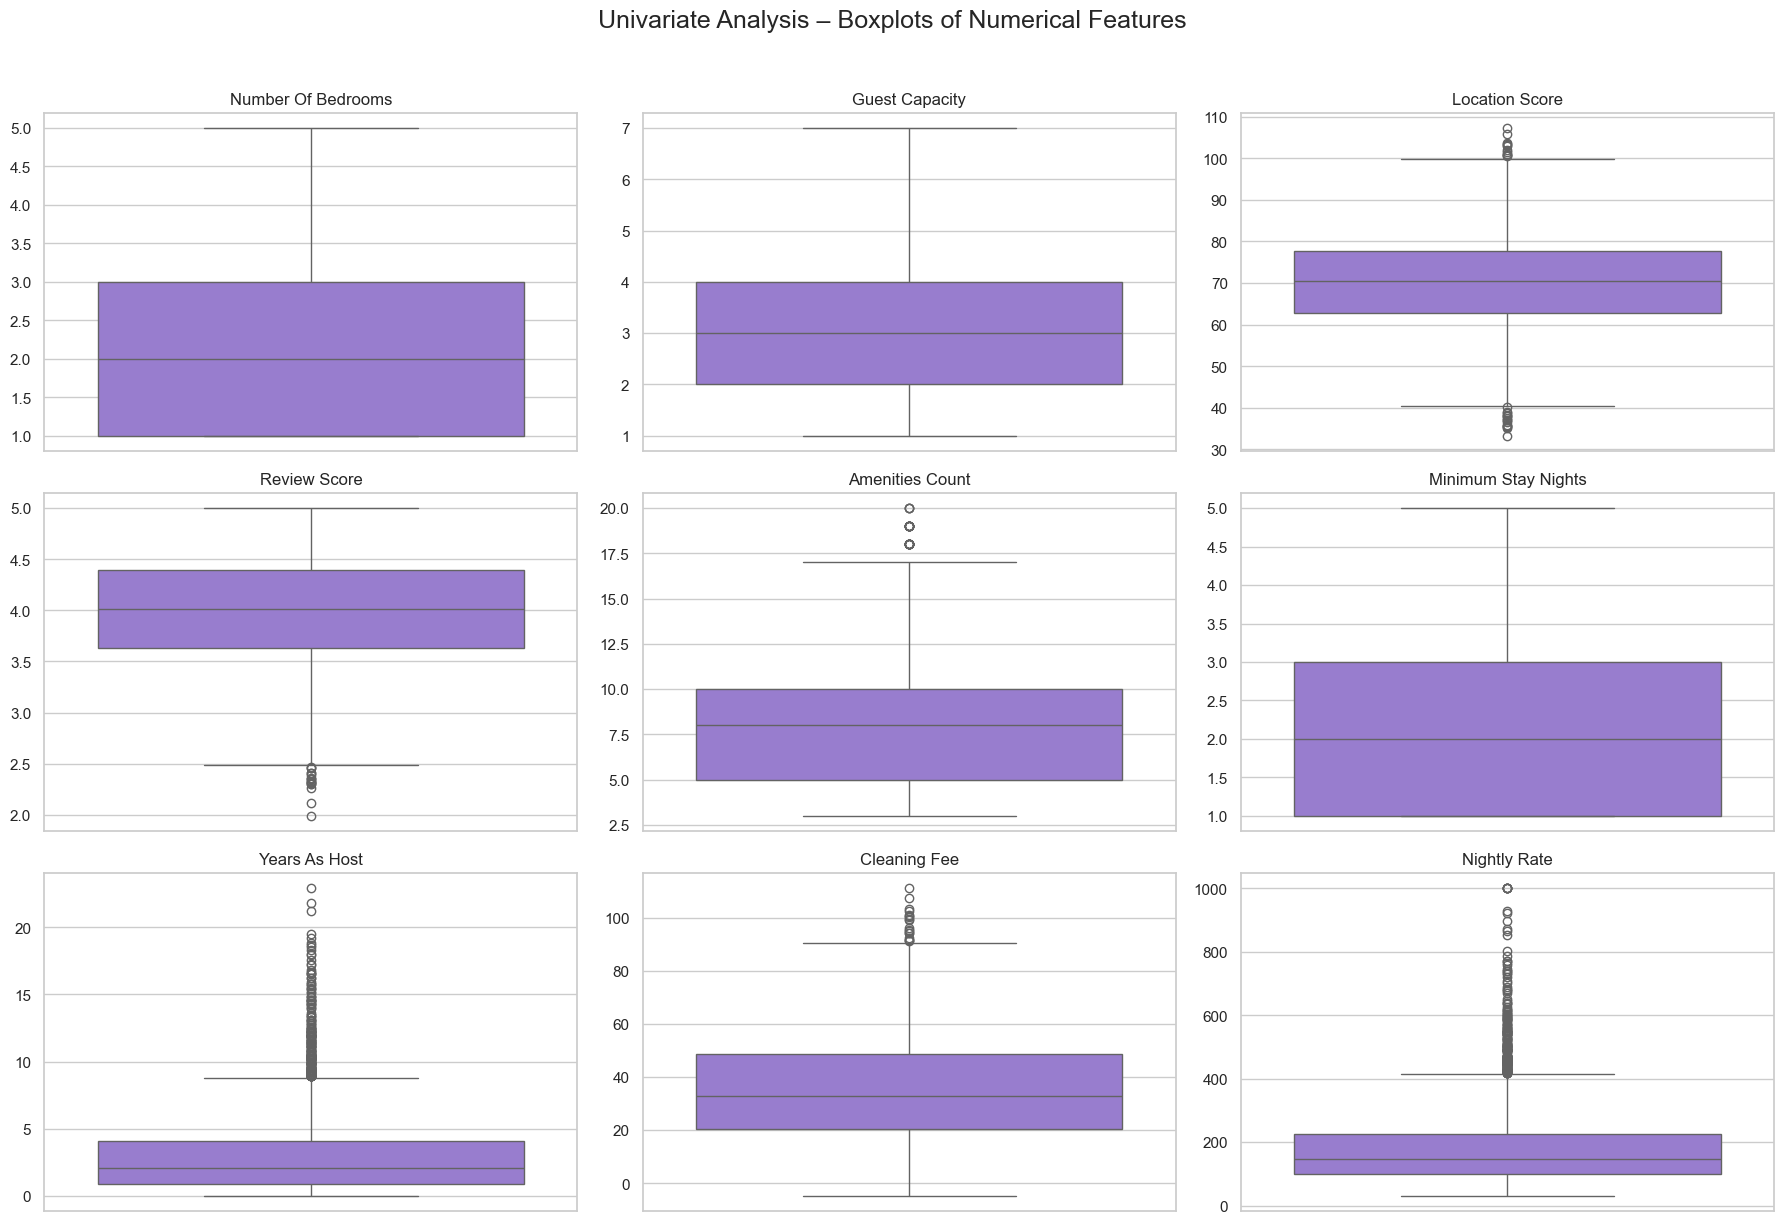

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric columns
num_cols = ['number_of_bedrooms', 'guest_capacity', 'location_score', 
            'review_score', 'amenities_count', 'minimum_stay_nights', 
            'years_as_host', 'cleaning_fee', 'nightly_rate']

# Style
sns.set(style="whitegrid", palette="Set2")

# Create 3x3 grid of boxplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='mediumpurple')
    axes[i].set_title(f"{col.replace('_', ' ').title()}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("Univariate Analysis – Boxplots of Numerical Features", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


### BIVARIATE ANALYSIS 

#### CORELATION MATRIX 

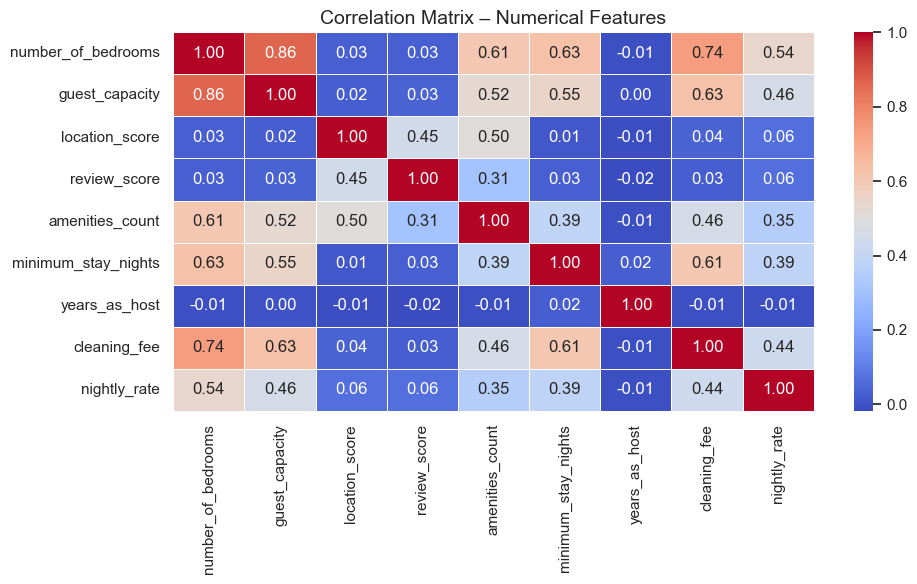

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose numerical columns only
num_cols = ['number_of_bedrooms', 'guest_capacity', 'location_score', 
            'review_score', 'amenities_count', 'minimum_stay_nights', 
            'years_as_host', 'cleaning_fee', 'nightly_rate']

plt.figure(figsize=(10, 6))
corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix – Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


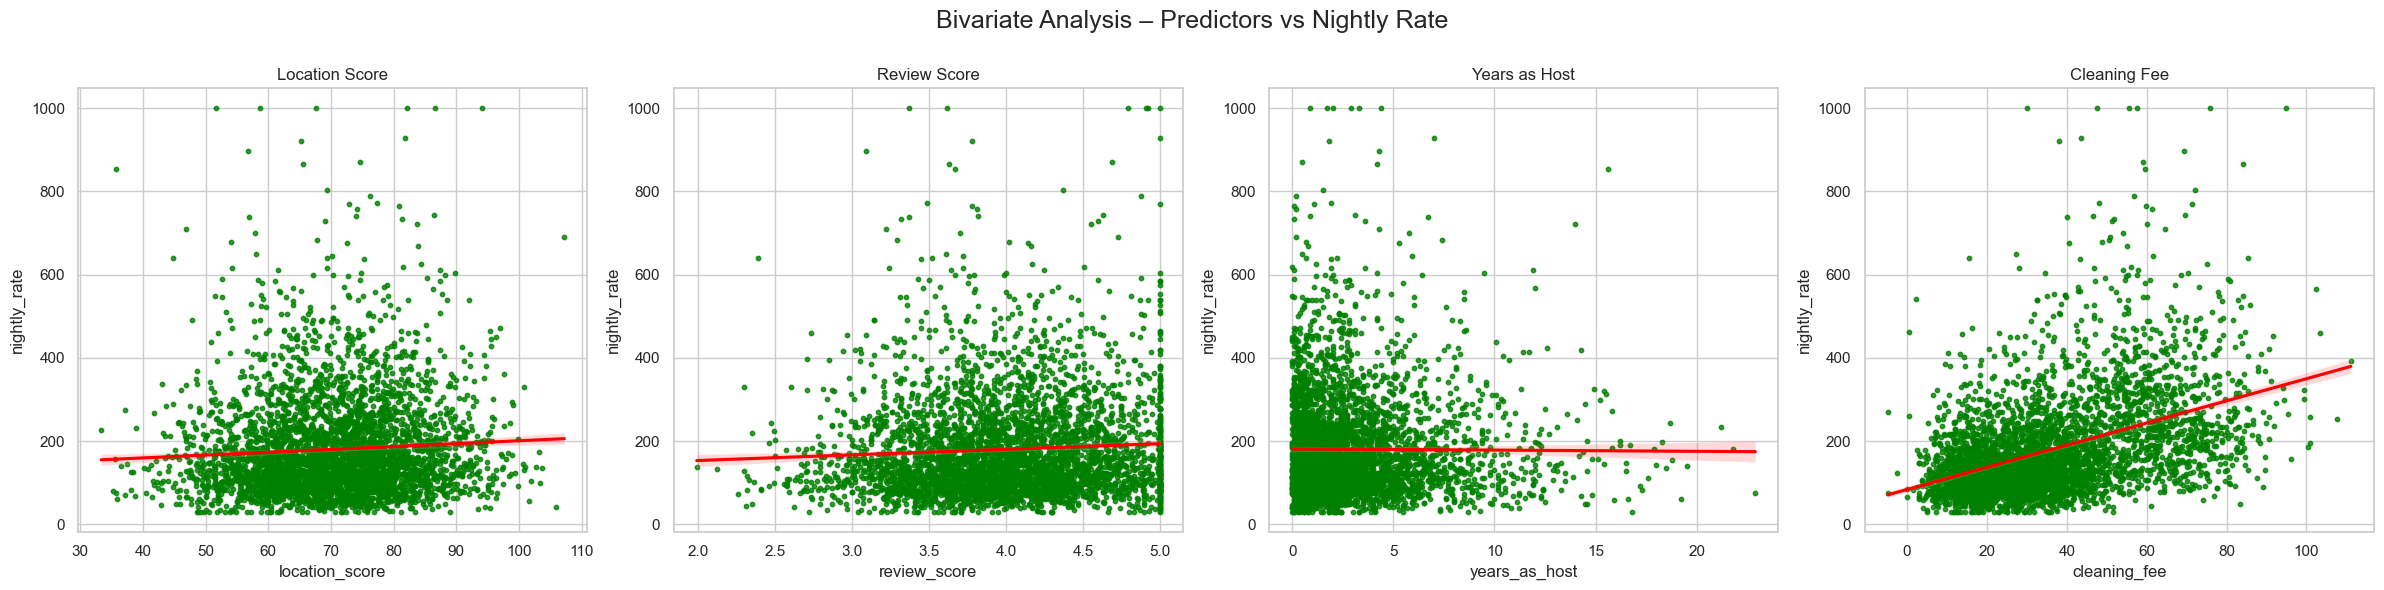

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(24, 6))
fig.suptitle("Bivariate Analysis – Predictors vs Nightly Rate", fontsize=18)

sns.regplot(ax=axes[0], data=df, x='location_score', y='nightly_rate',
            scatter_kws={'s': 10, 'color': 'green'}, line_kws={"color": "red"})
axes[0].set_title("Location Score")

sns.regplot(ax=axes[1], data=df, x='review_score', y='nightly_rate',
            scatter_kws={'s': 10, 'color': 'green'}, line_kws={"color": "red"})
axes[1].set_title("Review Score")

sns.regplot(ax=axes[2], data=df, x='years_as_host', y='nightly_rate',
            scatter_kws={'s': 10, 'color': 'green'}, line_kws={"color": "red"})
axes[2].set_title("Years as Host")

sns.regplot(ax=axes[3], data=df, x='cleaning_fee', y='nightly_rate',
            scatter_kws={'s': 10, 'color': 'green'}, line_kws={"color": "red"})
axes[3].set_title("Cleaning Fee")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


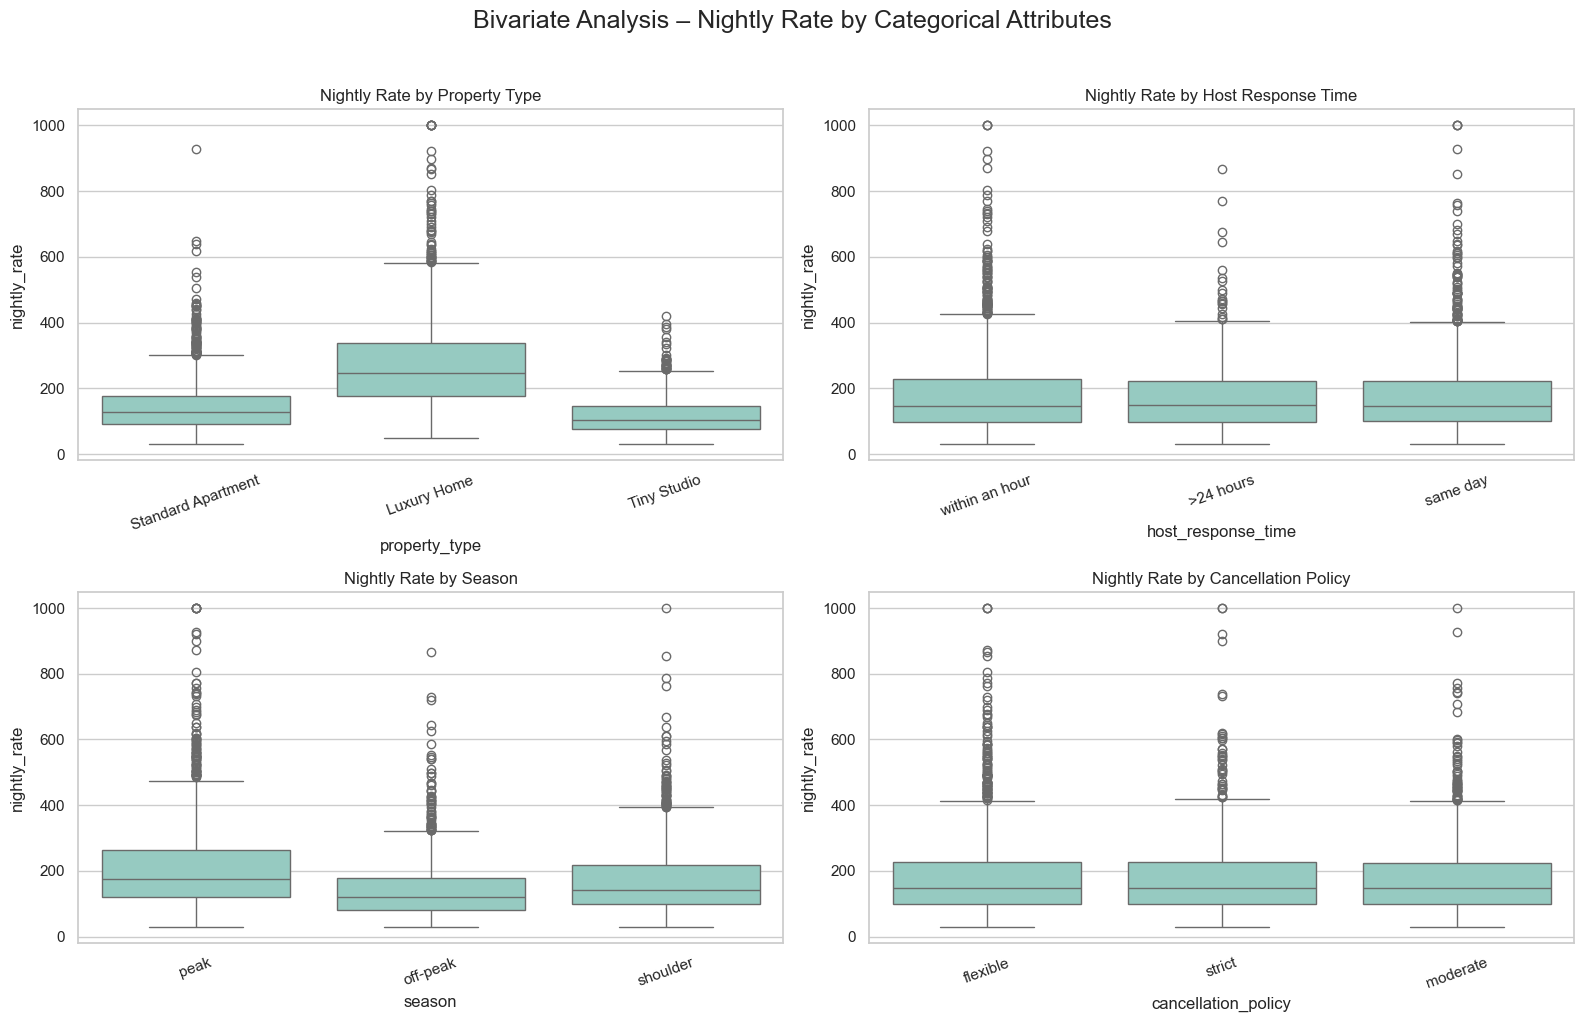

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid", palette="Set3")

# Categorical variables and target
cat_cols = ['property_type', 'host_response_time', 'season', 'cancellation_policy']
target = 'nightly_rate'

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(cat_cols):
    sns.boxplot(data=df, x=col, y=target, ax=axes[i])
    axes[i].set_title(f"{target.replace('_',' ').title()} by {col.replace('_',' ').title()}")
    axes[i].tick_params(axis='x', rotation=20)

# Layout adjustments
plt.suptitle("Bivariate Analysis – Nightly Rate by Categorical Attributes", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()



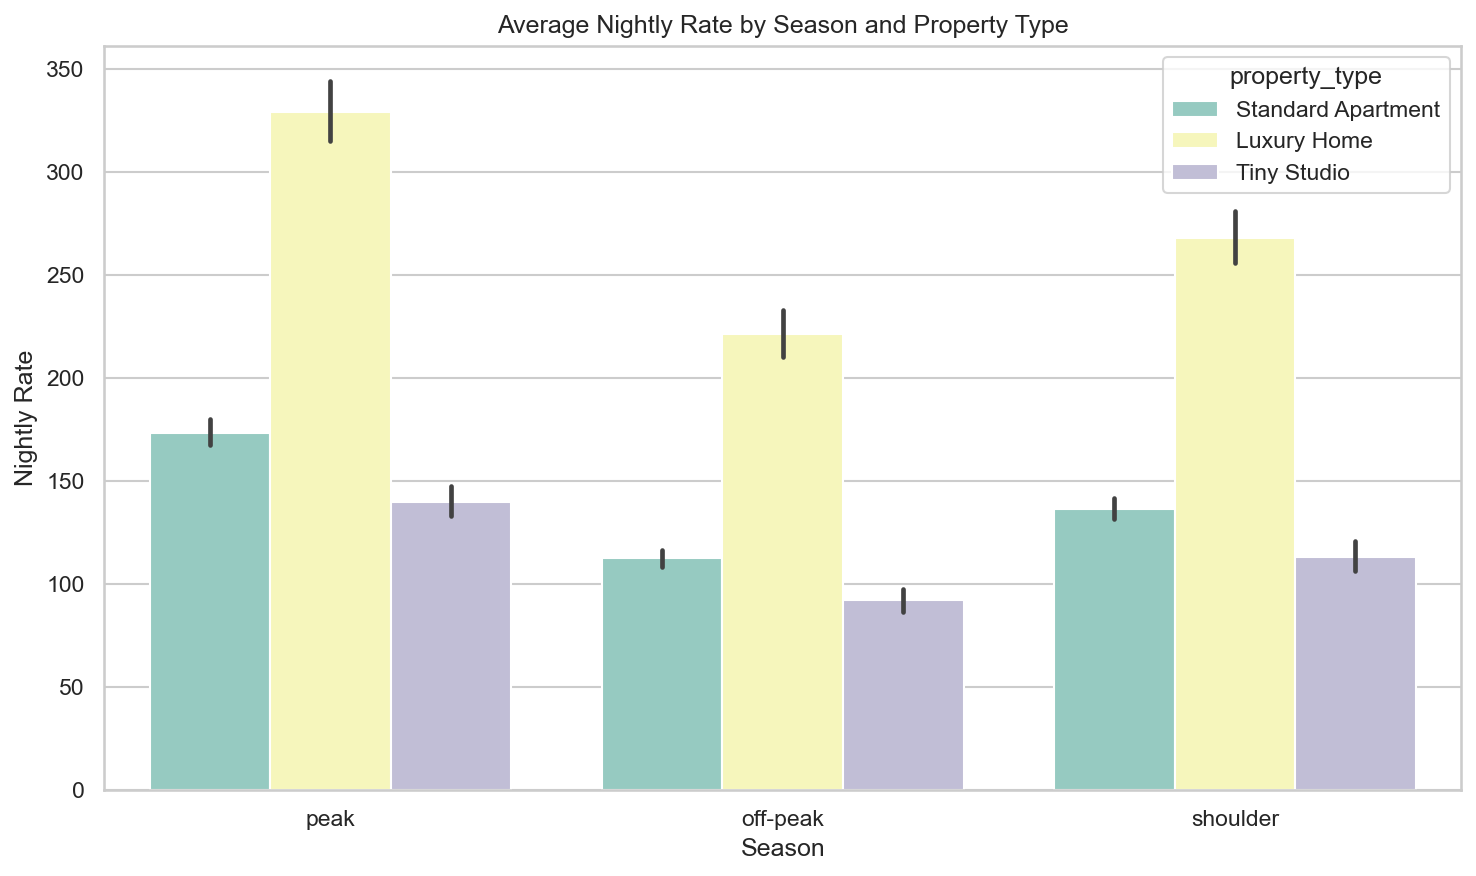

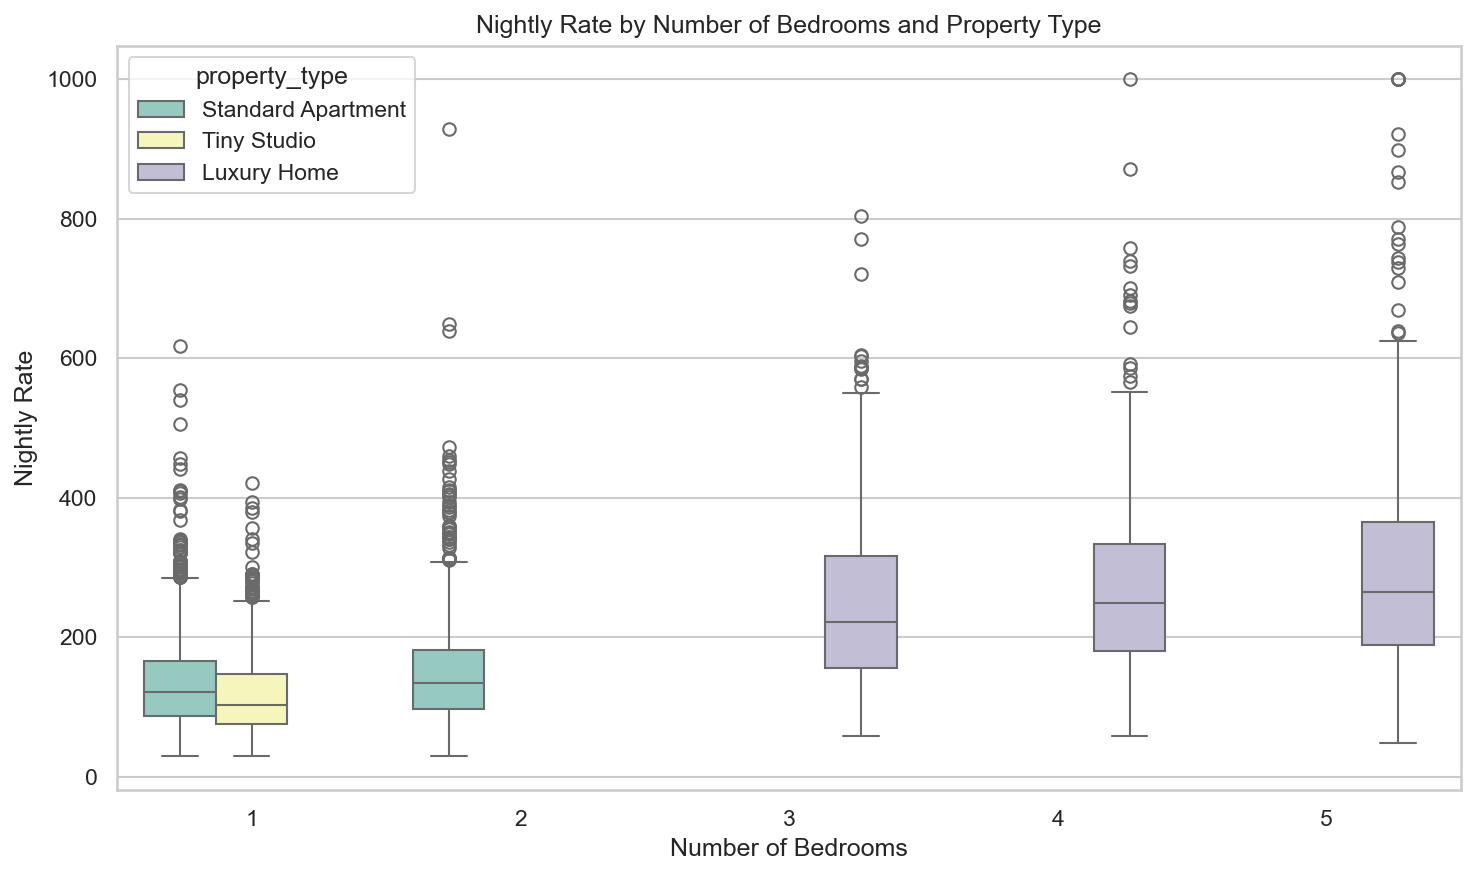

<Figure size 2000x1200 with 0 Axes>

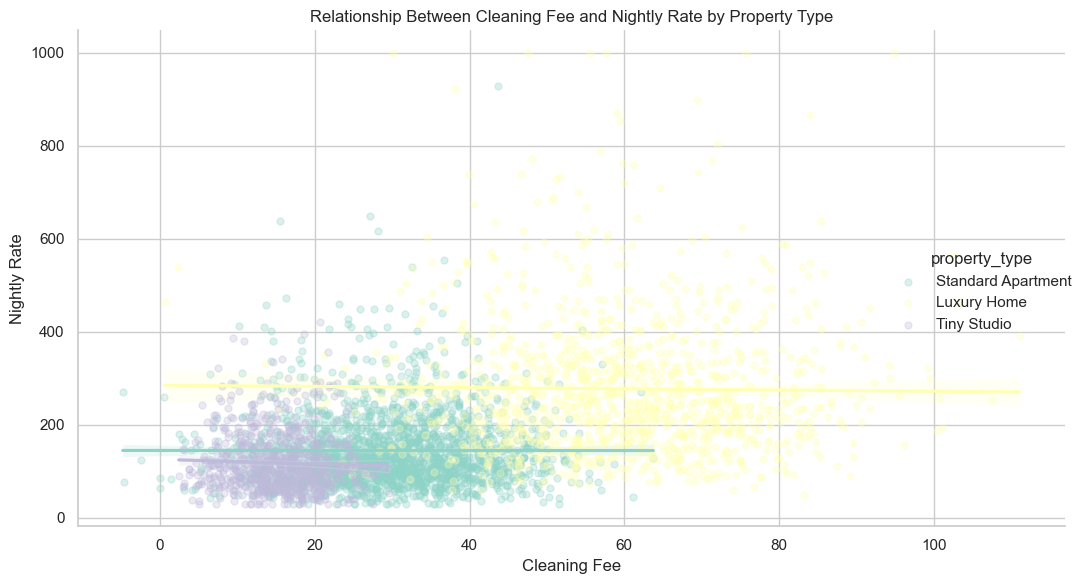

<Figure size 2000x1200 with 0 Axes>

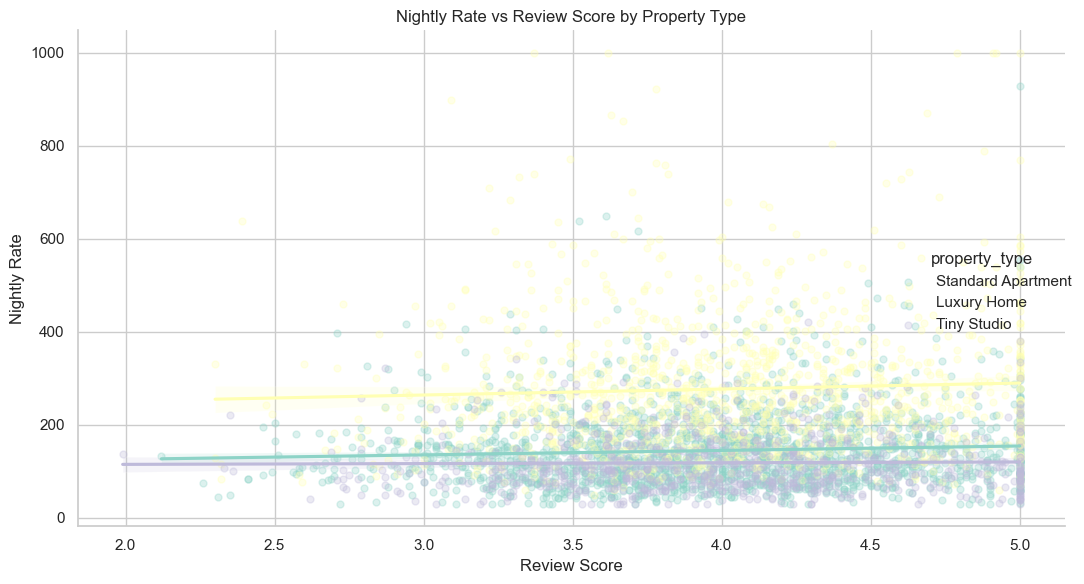

<Figure size 2000x1200 with 0 Axes>

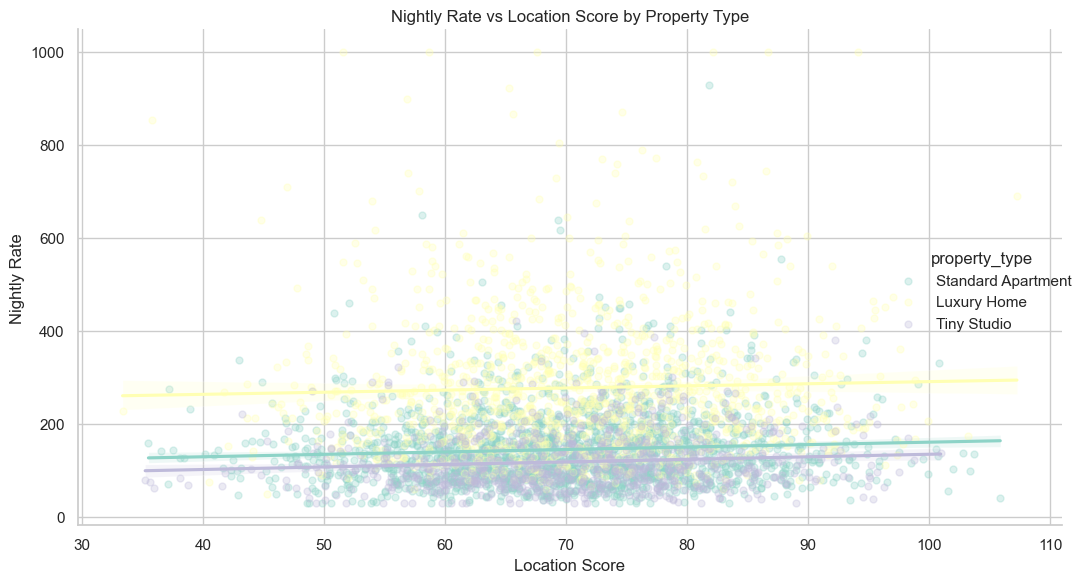

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample structure for illustration; assumes df is already loaded with necessary columns.
# Replace this with the actual dataframe if needed.

# 1. season × property_type
plt.figure(figsize=(10, 6), dpi = 150)
sns.barplot(data=df, x='season', y='nightly_rate', hue='property_type')
plt.title("Average Nightly Rate by Season and Property Type")
plt.xlabel("Season")
plt.ylabel("Nightly Rate")
plt.tight_layout()
plt.show()

# 2. number_of_bedrooms × property_type
plt.figure(figsize=(10, 6), dpi = 150)
sns.boxplot(data=df, x='number_of_bedrooms', y='nightly_rate', hue='property_type')
plt.title("Nightly Rate by Number of Bedrooms and Property Type")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Nightly Rate")
plt.tight_layout()
plt.show()

# 3. cleaning_fee × property_type
plt.figure(figsize=(10, 6), dpi = 200)
sns.lmplot(data=df, x='cleaning_fee', y='nightly_rate', hue='property_type', height=6, aspect=1.5, scatter_kws={'alpha': 0.3, 's': 25})
plt.title("Relationship Between Cleaning Fee and Nightly Rate by Property Type")
plt.xlabel("Cleaning Fee")
plt.ylabel("Nightly Rate")
plt.tight_layout()
plt.show()

# 4. review_score × property_type
plt.figure(figsize=(10, 6), dpi = 200)
sns.lmplot(data=df, x='review_score', y='nightly_rate', hue='property_type', height=6, aspect=1.5, scatter_kws={'alpha': 0.3, 's': 25})
plt.title("Nightly Rate vs Review Score by Property Type")
plt.xlabel("Review Score")
plt.ylabel("Nightly Rate")
plt.tight_layout()
plt.show()

# 5. location_score × property_type
plt.figure(figsize=(10, 6), dpi = 200)
sns.lmplot(data=df, x='location_score', y='nightly_rate', hue='property_type', height=6, aspect=1.5, scatter_kws={'alpha': 0.3, 's': 25})
plt.title("Nightly Rate vs Location Score by Property Type")
plt.xlabel("Location Score")
plt.ylabel("Nightly Rate")
plt.tight_layout()
plt.show()


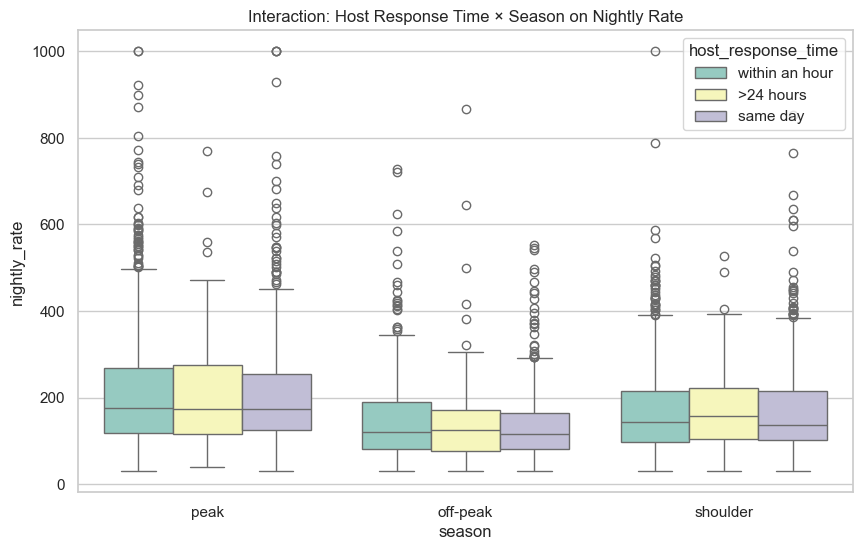

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='nightly_rate', hue='host_response_time', data=df)
plt.title("Interaction: Host Response Time × Season on Nightly Rate")
plt.show()


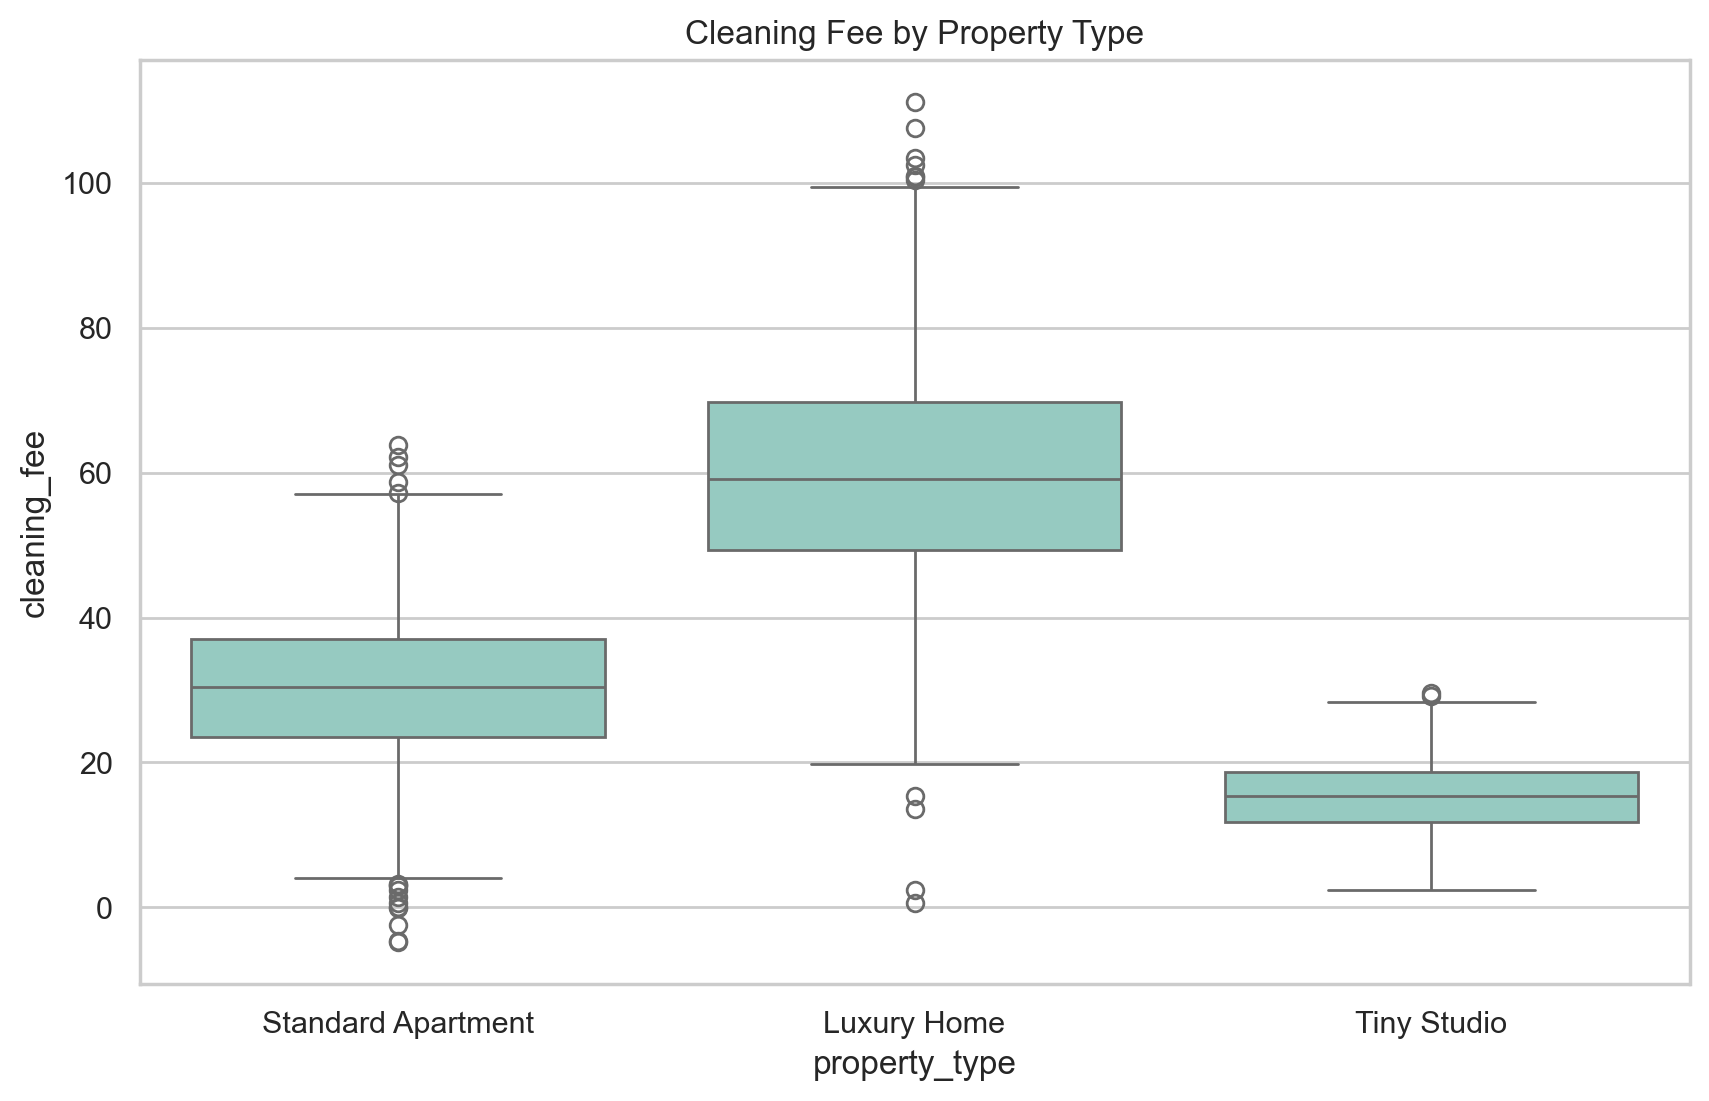

<Figure size 2000x1200 with 0 Axes>

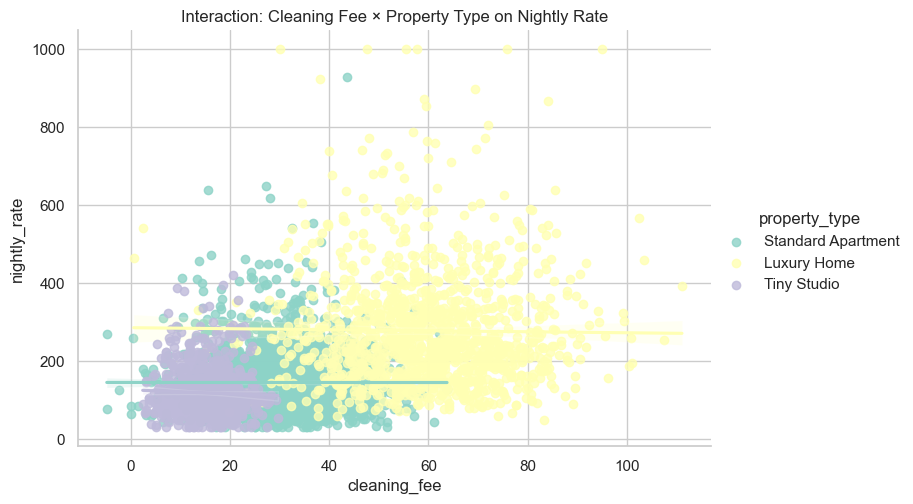

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi = 200)
sns.boxplot(x='property_type', y='cleaning_fee', data=df)
plt.title("Cleaning Fee by Property Type")
plt.show()

# Interaction effect on nightly rate
plt.figure(figsize=(10, 6), dpi = 200)
sns.lmplot(x='cleaning_fee', y='nightly_rate', hue='property_type', data=df, aspect=1.5)
plt.title("Interaction: Cleaning Fee × Property Type on Nightly Rate")
plt.show()


<Figure size 1000x600 with 0 Axes>

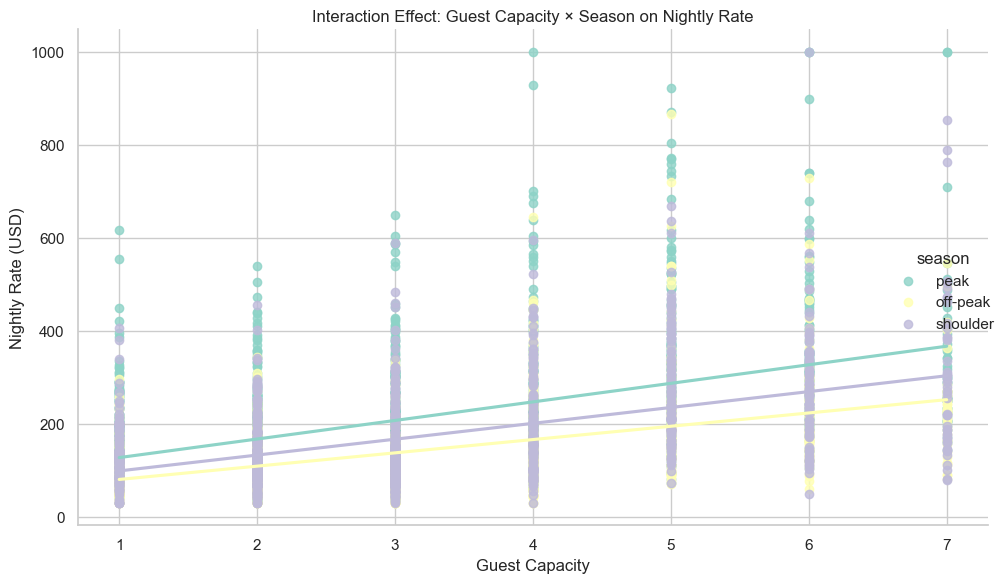

In [68]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=df,
    x="guest_capacity",
    y="nightly_rate",
    hue="season",
    height=6,
    aspect=1.5,
    ci=None
)
plt.title("Interaction Effect: Guest Capacity × Season on Nightly Rate")
plt.xlabel("Guest Capacity")
plt.ylabel("Nightly Rate (USD)")
plt.tight_layout()
plt.show()


### STATISTICAL ANALYSIS 

In [71]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


In [73]:
model1 = smf.ols("nightly_rate ~ C(property_type)", data=df).fit()
anova1 = anova_lm(model1, typ=2)
print(anova1)


                        sum_sq      df           F         PR(>F)
C(property_type)  1.704763e+07     2.0  822.623171  9.937069e-300
Residual          4.122941e+07  3979.0         NaN            NaN


In [75]:
model2 = smf.ols("nightly_rate ~ guest_capacity * C(property_type)", data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:           nightly_rate   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     338.4
Date:                Sat, 10 May 2025   Prob (F-statistic):          8.55e-303
Time:                        12:06:40   Log-Likelihood:                -24040.
No. Observations:                3982   AIC:                         4.809e+04
Df Residuals:                    3976   BIC:                         4.813e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [77]:
model3 = smf.ols("nightly_rate ~ number_of_bedrooms * C(property_type)", data=df).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:           nightly_rate   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     436.1
Date:                Sat, 10 May 2025   Prob (F-statistic):          4.80e-312
Time:                        12:06:48   Log-Likelihood:                -24022.
No. Observations:                3982   AIC:                         4.805e+04
Df Residuals:                    3977   BIC:                         4.809e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [79]:
model4 = smf.ols("nightly_rate ~ guest_capacity", data=df).fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:           nightly_rate   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sat, 10 May 2025   Prob (F-statistic):          1.75e-204
Time:                        12:06:57   Log-Likelihood:                -24280.
No. Observations:                3982   AIC:                         4.856e+04
Df Residuals:                    3980   BIC:                         4.858e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         70.6987      3.790     18.

In [81]:
model5 = smf.ols("nightly_rate ~ C(season)", data=df).fit()
anova5 = anova_lm(model5, typ=2)
print(anova5)


                 sum_sq      df           F        PR(>F)
C(season)  3.346458e+06     2.0  121.203489  8.000287e-52
Residual   5.493059e+07  3979.0         NaN           NaN


In [83]:
model6 = smf.ols("nightly_rate ~ C(property_type) * C(season)", data=df).fit()
print(model6.summary())


                            OLS Regression Results                            
Dep. Variable:           nightly_rate   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     282.8
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        12:07:14   Log-Likelihood:                -23849.
No. Observations:                3982   AIC:                         4.772e+04
Df Residuals:                    3973   BIC:                         4.777e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [85]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Model with interaction term
model1 = smf.ols("nightly_rate ~ cleaning_fee * C(property_type)", data=df).fit()
anova1 = anova_lm(model1, typ=2)
print(anova1)


                                     sum_sq      df           F         PR(>F)
C(property_type)               5.998818e+06     2.0  289.317445  4.939699e-118
cleaning_fee                   4.265689e+03     1.0    0.411461   5.212661e-01
cleaning_fee:C(property_type)  5.198837e+03     2.0    0.250735   7.782408e-01
Residual                       4.121995e+07  3976.0         NaN            NaN


In [87]:
model2 = smf.ols("nightly_rate ~ C(host_response_time) * C(season)", data=df).fit()
anova2 = anova_lm(model2, typ=2)
anova2


sum_sq      df           F  \
C(host_response_time)            2.779786e+04     2.0    1.006160   
C(season)                        3.347175e+06     2.0  121.152974   
C(host_response_time):C(season)  2.040884e+04     4.0    0.369355   
Residual                         5.488238e+07  3973.0         NaN   

                                       PR(>F)  
C(host_response_time)            3.657134e-01  
C(season)                        8.433731e-52  
C(host_response_time):C(season)  8.306165e-01  
Residual                                  NaN

In [89]:
model3 = smf.ols("nightly_rate ~ location_score * C(season)", data=df).fit()
anova3 = anova_lm(model3, typ=2)
print(anova3)


                                sum_sq      df           F        PR(>F)
C(season)                 3.378996e+06     2.0  122.892921  1.632868e-52
location_score            2.656546e+05     1.0   19.323534  1.132198e-05
location_score:C(season)  3.984755e+03     2.0    0.144924  8.650925e-01
Residual                  5.466095e+07  3976.0         NaN           NaN


### INFERENCE FOR PREDICTVE MODELLING 

#### LINEAR MODEL

In [94]:
# BASELINE LINEAR MODEL - INCLUDING ALL FEATURES AND INTERACTION TERMS 

                            OLS Regression Results                            
Dep. Variable:           nightly_rate   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     47.40
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        12:10:21   Log-Likelihood:                -23792.
No. Observations:                3982   AIC:                         4.769e+04
Df Residuals:                    3930   BIC:                         4.801e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

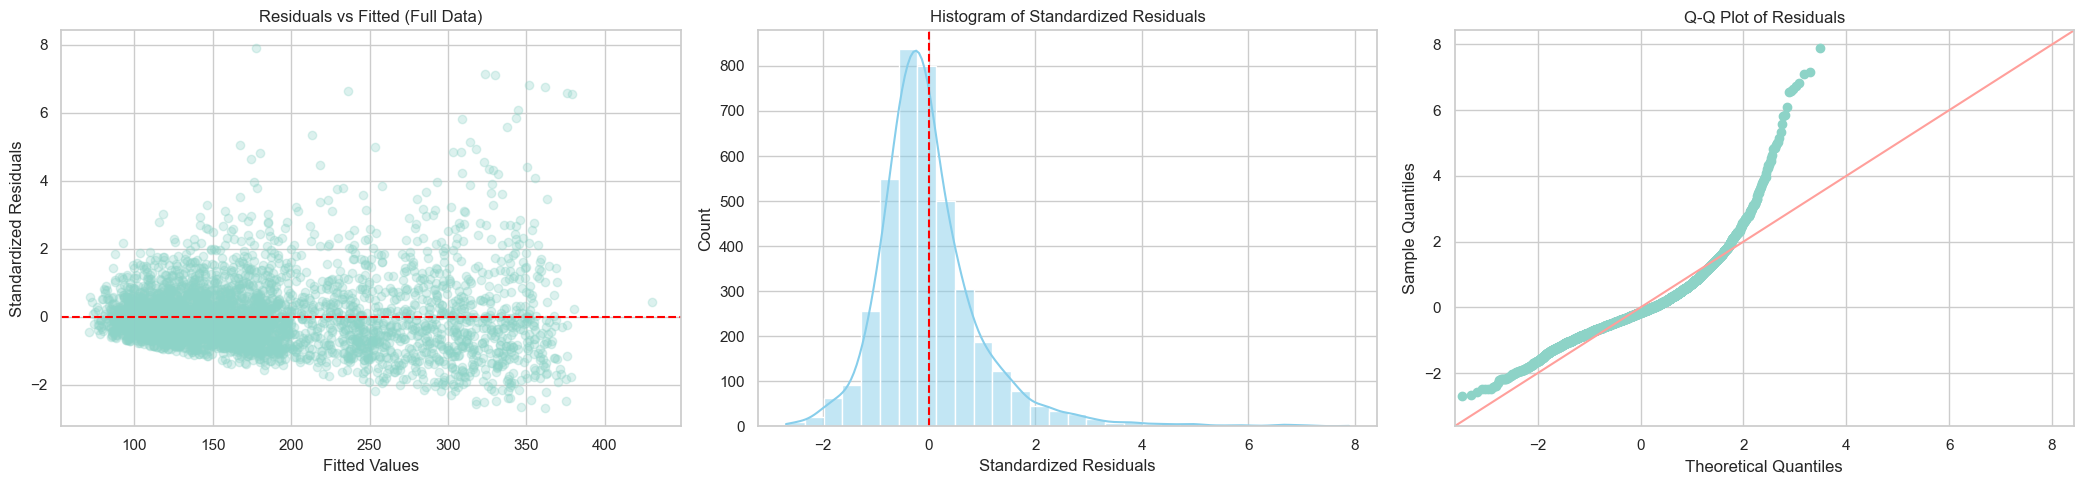

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import skew

# Step 1: Copy data
df_model = df.copy()

# Step 2: Transform log_cleaning_fee and cap years_as_host
df_model['log_cleaning_fee'] = np.log(df_model['cleaning_fee'].clip(lower=1))  # avoid log(0)
df_model['years_as_host'] = df_model['years_as_host'].clip(upper=17)

# Step 3: Build design matrices
formula = """
nightly_rate ~
    C(property_type) + C(season) + C(host_response_time) + C(cancellation_policy) +
    number_of_bedrooms + guest_capacity + location_score + review_score +
    amenities_count + minimum_stay_nights + years_as_host + log_cleaning_fee +
    
    C(property_type):C(season) + C(property_type):guest_capacity +
    guest_capacity:location_score + review_score:location_score +
    number_of_bedrooms:log_cleaning_fee + guest_capacity:log_cleaning_fee +
    log_cleaning_fee:review_score + review_score:amenities_count +
    guest_capacity:number_of_bedrooms + minimum_stay_nights:location_score +
    log_cleaning_fee:minimum_stay_nights + C(property_type):log_cleaning_fee +
    C(property_type):review_score + guest_capacity:C(season) +
    review_score:C(property_type) + cleaning_fee:C(cancellation_policy) +
    location_score:number_of_bedrooms + amenities_count:C(property_type) +
    C(season):location_score + location_score:C(host_response_time) +
    review_score:C(season) + guest_capacity:C(cancellation_policy)
"""

y, X = dmatrices(formula, data=df_model, return_type='dataframe')

# Step 4: Fit OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

# Step 5: Predictions
preds = model.predict(X)
actuals = df_model["nightly_rate"]

# Step 6: Evaluation metrics
r2 = r2_score(actuals, preds)
mae = mean_absolute_error(actuals, preds)
rmse = np.sqrt(mean_squared_error(actuals, preds))

print(f"\nEvaluation Metrics (Full Data, Dollar Scale):")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# Step 7: Diagnostics
influence = model.get_influence()
std_resid = influence.resid_studentized_internal
fitted_vals = model.fittedvalues
resid_skew = skew(std_resid)

print(f"\nSkewness of Standardized Residuals: {resid_skew:.3f}")

# Step 8: Diagnostic Plots
fig, ax = plt.subplots(1, 3, figsize=(21, 5))

# 1. Residuals vs Fitted
ax[0].scatter(fitted_vals, std_resid, alpha=0.3)
ax[0].axhline(0, linestyle='--', color='red')
ax[0].set_title('Residuals vs Fitted (Full Data)')
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Standardized Residuals')

# 2. Histogram of Residuals
sns.histplot(std_resid, bins=30, kde=True, ax=ax[1], color='skyblue')
ax[1].axvline(0, linestyle='--', color='red')
ax[1].set_title('Histogram of Standardized Residuals')
ax[1].set_xlabel('Standardized Residuals')

# 3. Q-Q Plot
sm.graphics.qqplot(std_resid, line='45', ax=ax[2])
ax[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


In [104]:
#Using Backward Elimination to see which are the significant features:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler

# Step 1: Copy and transform dataset
df_model = df.copy()

# Step 2: Log transform target
df_model['log_nightly_rate'] = np.log(df_model['nightly_rate'])

# Step 3: Cap years_as_host at 17
df_model['years_as_host'] = df_model['years_as_host'].clip(upper=17)

# Step 4: Scale continuous variables (excluding log-transformed cleaning fee)
scaler = StandardScaler()
scaled_cols = ['number_of_bedrooms', 'guest_capacity', 'location_score', 
               'review_score', 'amenities_count', 'minimum_stay_nights', 
               'years_as_host']
df_model[scaled_cols] = scaler.fit_transform(df_model[scaled_cols])

# Step 5: Define full formula (replacing cleaning_fee with log_cleaning_fee)
full_formula ="""
log_nightly_rate ~
    C(property_type) +
    C(season) +
    C(host_response_time) +
    C(cancellation_policy) +
    
    number_of_bedrooms +
    guest_capacity +
    location_score +
    review_score +
    amenities_count +
    minimum_stay_nights +
    years_as_host +
    cleaning_fee +
    
    C(property_type):C(season) +
    C(property_type):guest_capacity +
    guest_capacity:location_score +
    review_score:location_score +
    number_of_bedrooms:cleaning_fee +
    guest_capacity:cleaning_fee +
    cleaning_fee:review_score +
    review_score:amenities_count +
    guest_capacity:number_of_bedrooms +
    minimum_stay_nights:location_score +
    cleaning_fee:minimum_stay_nights +
    C(property_type):cleaning_fee +
    C(property_type):review_score +
    guest_capacity:C(season) +
    review_score:C(property_type) +
    cleaning_fee:C(cancellation_policy) +
    location_score:number_of_bedrooms +
    amenities_count:C(property_type) +
    C(season):location_score +
    location_score:C(host_response_time) +
    review_score:C(season) +
    guest_capacity:C(cancellation_policy)
"""

# Step 6: Build design matrices
y, X = dmatrices(full_formula, data=df_model, return_type='dataframe')

# Step 7: Backward elimination loop
remaining_vars = X.columns.tolist()
p_threshold = 0.05
iteration = 1

while True:
    model = sm.OLS(y, X[remaining_vars]).fit()
    p_values = model.pvalues
    max_p = p_values.max()
    if max_p > p_threshold:
        worst_feature = p_values.idxmax()
        print(f"Iteration {iteration}: Removing '{worst_feature}' (p = {max_p:.4f})")
        remaining_vars.remove(worst_feature)
        iteration += 1
    else:
        break

# Step 8: Final model summary
final_model = sm.OLS(y, X[remaining_vars]).fit()
print("\nFinal Model Summary:")
print(final_model.summary())

print(f"\nAdjusted R-squared: {final_model.rsquared_adj:.4f}")
print(f"AIC: {final_model.aic:.2f}")

print("\nRemaining Variables:")
for var in remaining_vars:
    print(f"- {var}")


Iteration 1: Removing 'C(cancellation_policy)[T.strict]' (p = 0.9924)
Iteration 2: Removing 'C(property_type)[T.Standard Apartment]:cleaning_fee' (p = 0.9852)
Iteration 3: Removing 'minimum_stay_nights' (p = 0.9797)
Iteration 4: Removing 'review_score:C(season)[T.peak]' (p = 0.9721)
Iteration 5: Removing 'years_as_host' (p = 0.9331)
Iteration 6: Removing 'C(property_type)[T.Standard Apartment]:C(season)[T.peak]' (p = 0.9310)
Iteration 7: Removing 'C(season)[T.peak]:location_score' (p = 0.9091)
Iteration 8: Removing 'cleaning_fee' (p = 0.8357)
Iteration 9: Removing 'C(cancellation_policy)[T.moderate]' (p = 0.8483)
Iteration 10: Removing 'review_score:amenities_count' (p = 0.8227)
Iteration 11: Removing 'amenities_count' (p = 0.6900)
Iteration 12: Removing 'cleaning_fee:C(cancellation_policy)[T.strict]' (p = 0.6747)
Iteration 13: Removing 'guest_capacity:location_score' (p = 0.6268)
Iteration 14: Removing 'location_score:number_of_bedrooms' (p = 0.6046)
Iteration 15: Removing 'cleaning_f

                            OLS Regression Results                            
Dep. Variable:       log_nightly_rate   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        12:14:04   Log-Likelihood:                -2068.6
No. Observations:                3178   AIC:                             4151.
Df Residuals:                    3171   BIC:                             4194.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

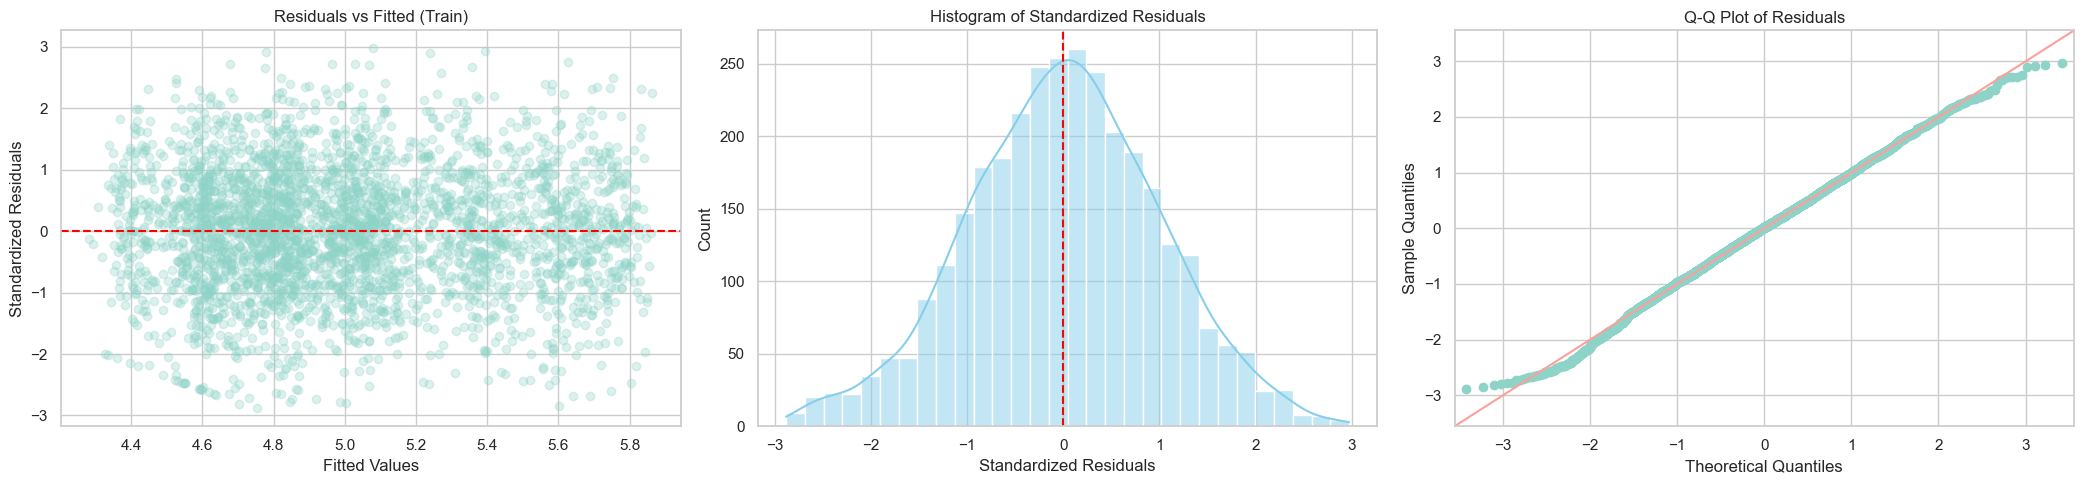

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Copy and log-transform the target
df_model = df.copy()
df_model['log_nightly_rate'] = np.log(df_model['nightly_rate'])

# Step 2: Standardize numeric features
scaler = StandardScaler()
df_model[['number_of_bedrooms', 'location_score']] = scaler.fit_transform(
    df_model[['number_of_bedrooms', 'location_score']]
)

# Step 3: Build design matrices
formula = """
    log_nightly_rate ~ number_of_bedrooms + location_score + C(property_type) + C(season) 
"""
y_log, X_log = dmatrices(formula, data=df_model, return_type='dataframe')

# Step 4: Initial model to compute residuals
model_initial = sm.OLS(y_log, X_log).fit()
influence = model_initial.get_influence()
std_resid = influence.resid_studentized_internal

# Step 5: Remove outliers with |residual| > 3
mask = np.abs(std_resid) <= 3
X_log_filtered = X_log[mask]
y_log_filtered = y_log[mask]
df_model_filtered = df_model.loc[mask]

# Step 6: Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_log_filtered, y_log_filtered, test_size=0.2, random_state=42
)

# Step 7: Fit model on training data
model_log = sm.OLS(y_train, X_train).fit()
print(model_log.summary())

# Step 8: Predict on test data and back-transform
log_preds_test = model_log.predict(X_test)
preds_test = np.exp(log_preds_test)
actuals_test = np.exp(y_test.values.ravel())

# Step 9: Evaluate performance on test set
r2 = r2_score(actuals_test, preds_test)
mae = mean_absolute_error(actuals_test, preds_test)
rmse = np.sqrt(mean_squared_error(actuals_test, preds_test))

print(f"\nTest Set Evaluation Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

resid_skew = skew(std_resid)

print(f"\nSkewness of Standardized Residuals: {resid_skew:.3f}")

# Step 10: Diagnostics on training residuals
influence_train = model_log.get_influence()
std_resid_train = influence_train.resid_studentized_internal
fitted_vals_train = model_log.fittedvalues

# Diagnostic Plots (Train Data)
fig, ax = plt.subplots(1, 3, figsize=(21, 5))

# 1. Residuals vs Fitted
ax[0].scatter(fitted_vals_train, std_resid_train, alpha=0.3)
ax[0].axhline(0, linestyle='--', color='red')
ax[0].set_title('Residuals vs Fitted (Train)')
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Standardized Residuals')

# 2. Histogram of Residuals
sns.histplot(std_resid_train, bins=30, kde=True, ax=ax[1], color='skyblue')
ax[1].axvline(0, linestyle='--', color='red')
ax[1].set_title('Histogram of Standardized Residuals')
ax[1].set_xlabel('Standardized Residuals')

# 3. Q-Q Plot
sm.graphics.qqplot(std_resid_train, line='45', ax=ax[2])
ax[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reuse your X matrix (design matrix used to fit the model)
# Drop the intercept if present, as it's not needed for VIF
X_vif = X_log.drop(columns=['Intercept'], errors='ignore')

# Create a DataFrame to display VIFs
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by highest VIF
vif_df = vif_df.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Display
print(vif_df)


                                  Feature       VIF
0  C(property_type)[T.Standard Apartment]  2.862030
1                       C(season)[T.peak]  2.101974
2         C(property_type)[T.Tiny Studio]  2.073005
3                      number_of_bedrooms  2.015174
4                   C(season)[T.shoulder]  1.810669
5                          location_score  1.001758


#### DECISION TREE MODEL 

Decision Tree Performance:
R² Score: 0.359
Mean Absolute Error (MAE): $70.36


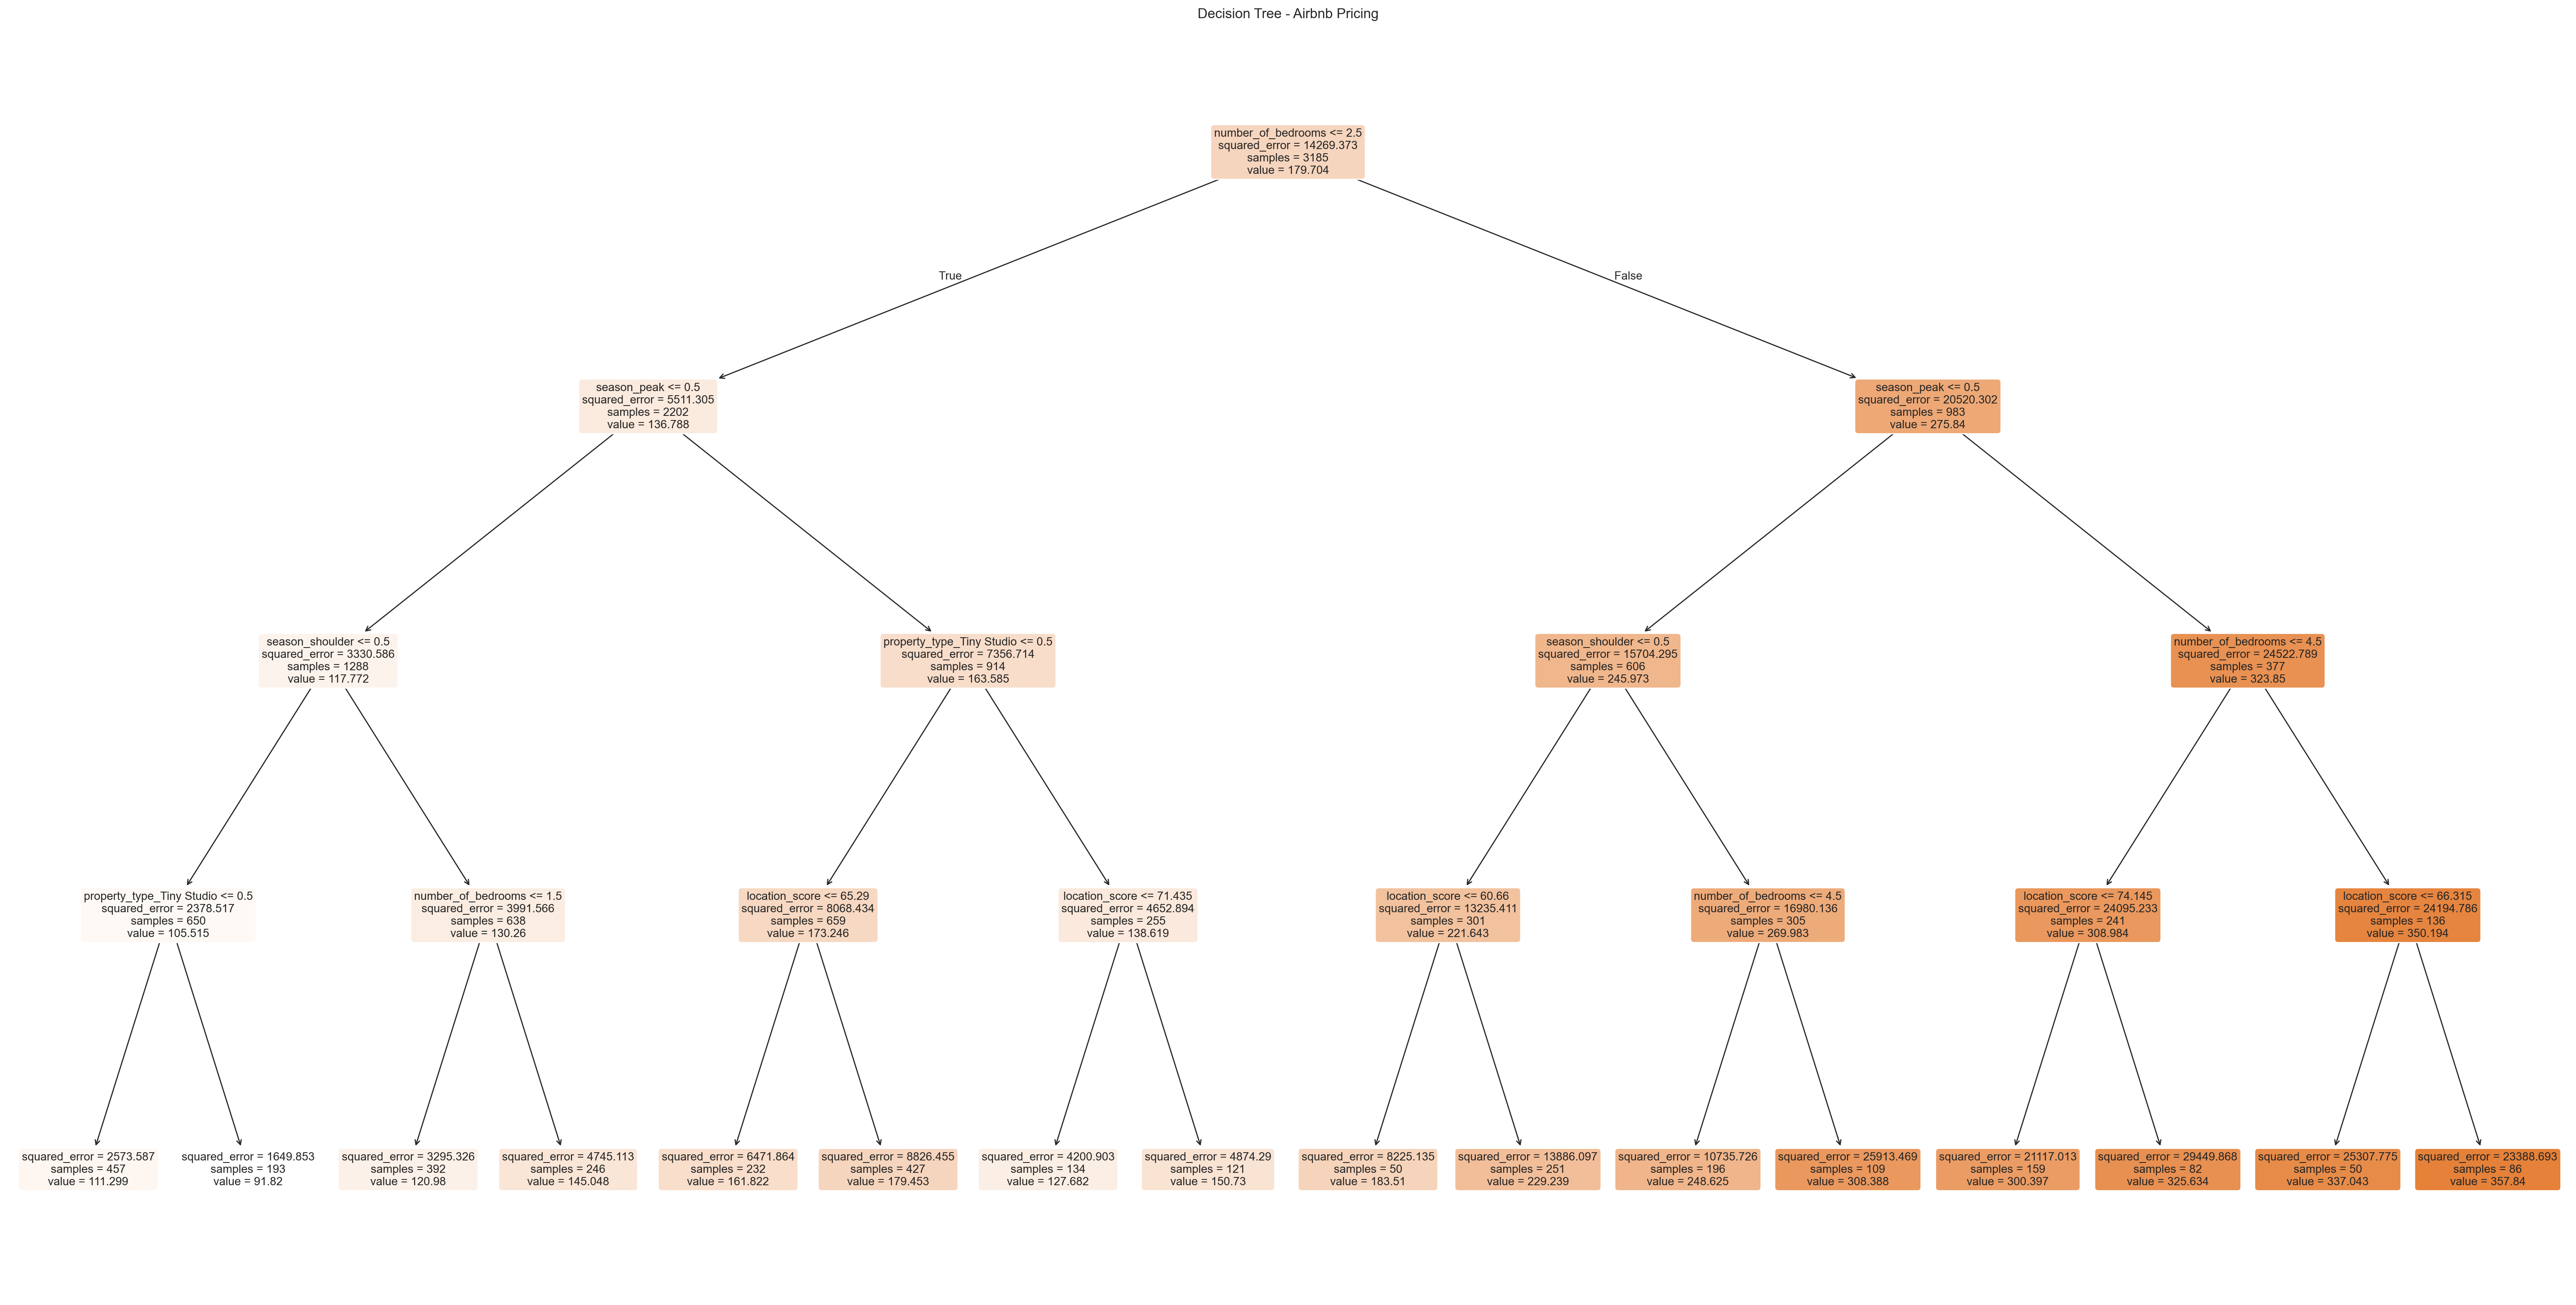

In [114]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Prepare the data
df_model = df.copy()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_model[['property_type', 'season']], drop_first=True)
df_final = pd.concat([
    df_model[['nightly_rate', 'location_score', 'number_of_bedrooms']],
    df_encoded
], axis=1)

# Step 2: Train-test split
X = df_final.drop('nightly_rate', axis=1)
y = df_final['nightly_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=50, random_state=42)
tree_model.fit(X_train, y_train)

# Step 4: Evaluate model
y_pred = tree_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Decision Tree Performance:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")

# Step 5: Visualize Tree
plt.figure(figsize=(40, 20), dpi = 200)
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree - Airbnb Pricing")
plt.show()


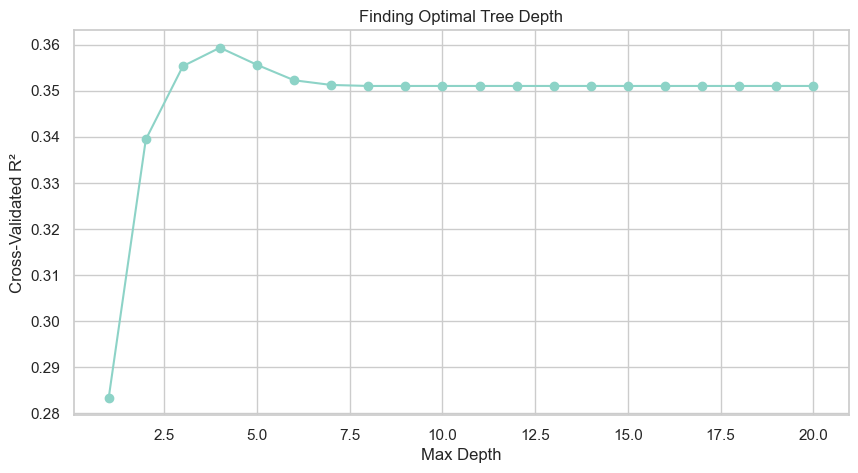

Best max_depth: 4 with R²: 0.359


In [116]:
#CHECKING IF MAX DEPTH TAKEN IN DECISION TREE IS CORRET
from sklearn.model_selection import cross_val_score

# Try depths from 1 to 20
depths = list(range(1, 21))
r2_scores = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=50, random_state=42)
    scores = cross_val_score(tree, X, y, cv=5, scoring='r2')
    r2_scores.append(scores.mean())

# Plot depth vs R²
plt.figure(figsize=(10, 5))
plt.plot(depths, r2_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validated R²")
plt.title("Finding Optimal Tree Depth")
plt.grid(True)
plt.show()

# Best depth
best_depth = depths[np.argmax(r2_scores)]
print(f"Best max_depth: {best_depth} with R²: {max(r2_scores):.3f}")


#### MODEL EXPLAINABILITY 

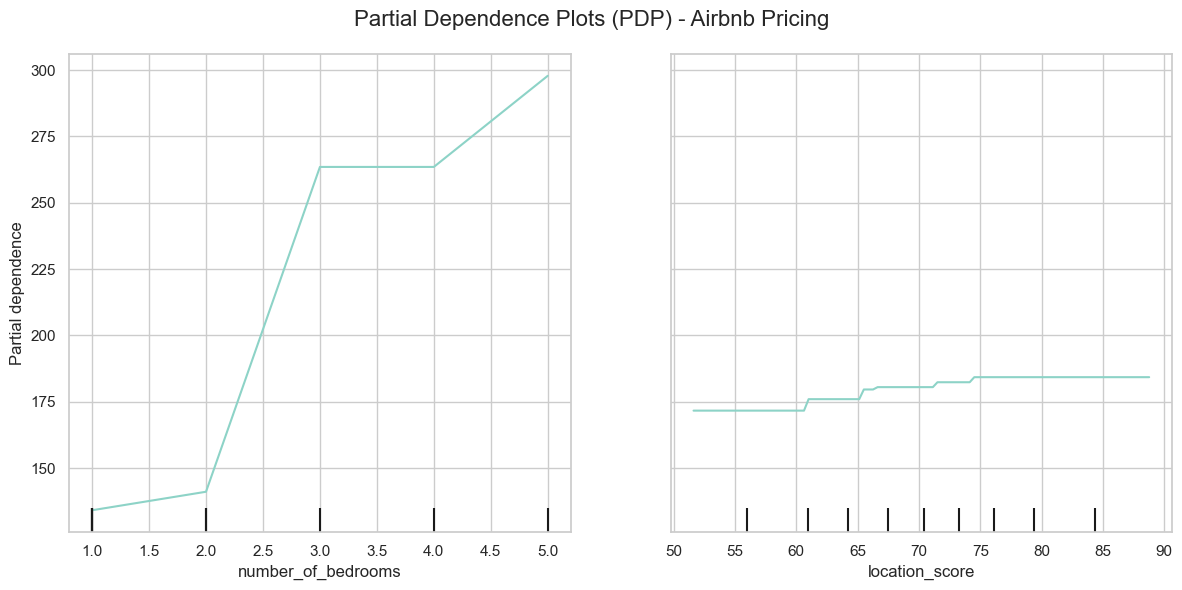

In [119]:
#PDP 1D PLOTS OF CONTINOUS FEATURES
from sklearn.inspection import PartialDependenceDisplay

# List of features for PDP (choose 2 numeric ones based on importance and relevance)
features_to_plot = ['number_of_bedrooms', 'location_score']

# Create PDPs
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    estimator=tree_model,
    X=X_train,
    features=features_to_plot,
    grid_resolution=100,
    kind='average',
    ax=ax
)
plt.suptitle("Partial Dependence Plots (PDP) - Airbnb Pricing", fontsize=16)
plt.tight_layout()
plt.show()


In [127]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Step 1: Select features (numerical + categorical to encode)
features_to_use = [
    'nightly_rate', 'location_score', 'number_of_bedrooms', 'guest_capacity',
    'review_score', 'amenities_count', 'minimum_stay_nights', 'years_as_host',
    'cleaning_fee', 'host_response_time', 'season', 'cancellation_policy', 'property_type'
]

# Step 2: Subset and encode
df_selected = df[features_to_use].copy()
df_encoded = pd.get_dummies(df_selected, columns=['host_response_time', 'season', 'cancellation_policy', 'property_type'], drop_first=True)

# Step 3: Define X and y
X = df_encoded.drop(columns=['nightly_rate'])
y = df_encoded['nightly_rate']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

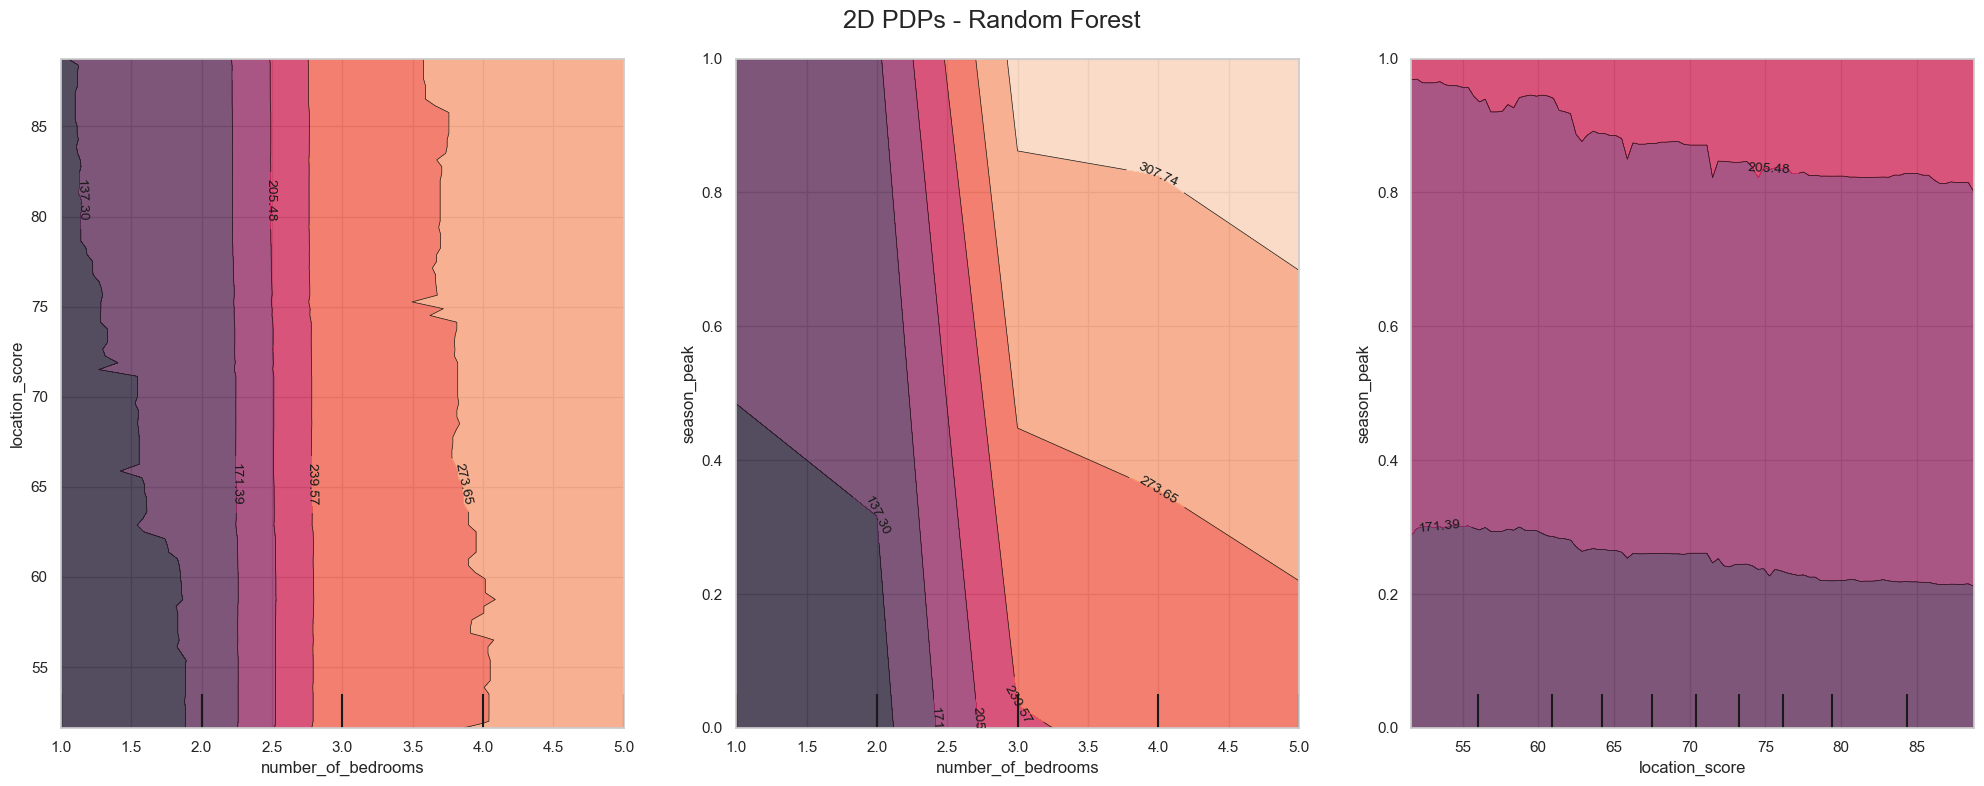

In [129]:
# Step 6: 2D PDP plots (all pairwise interactions of selected features)
features = [
    ('number_of_bedrooms', 'location_score'),
    ('number_of_bedrooms', 'season_peak'),
    ('location_score', 'season_peak'),
]

# Plot
fig, ax = plt.subplots(figsize=(20, 8))
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, features=features, kind='average', ax=ax
)
plt.suptitle("2D PDPs - Random Forest", fontsize=18)
plt.tight_layout()
plt.show()


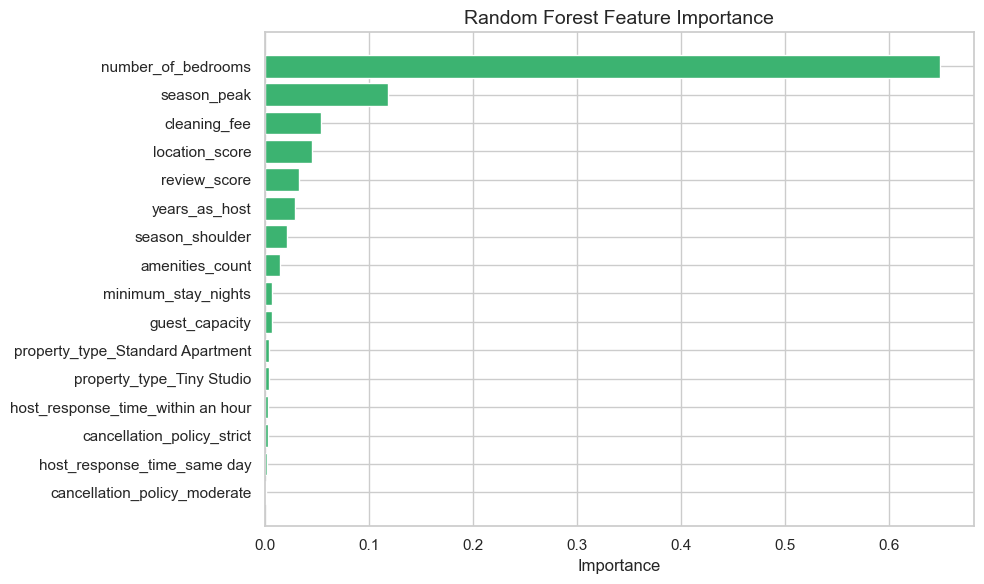

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='mediumseagreen')
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance", fontsize=14)
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


#### SHAP

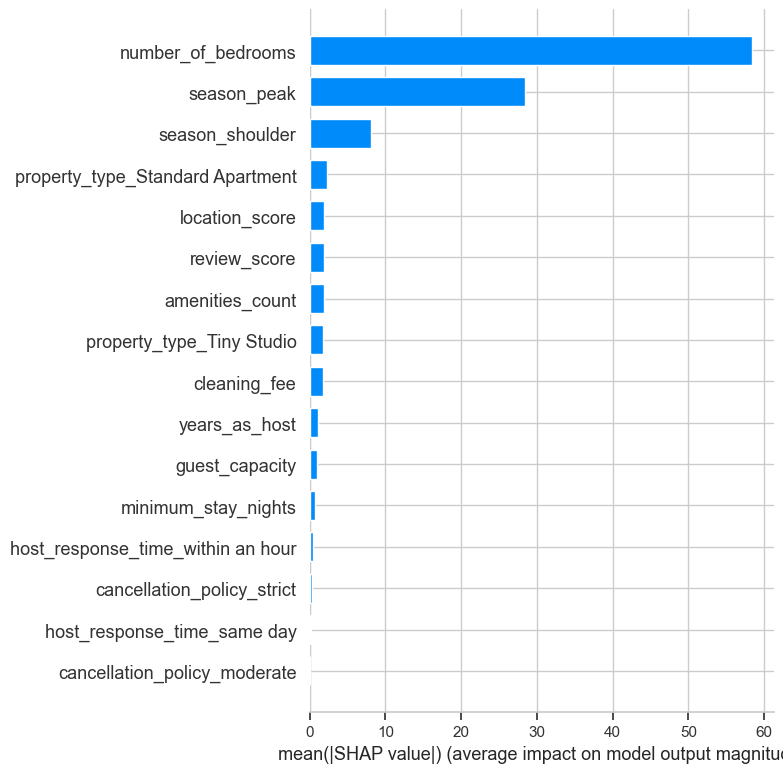

In [135]:
import shap

# Convert boolean columns to integers in X_test
X_test_fixed = X_test.astype({col: int for col in X_test.select_dtypes(include='bool').columns})

# Create SHAP TreeExplainer for the random forest model
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_fixed)

# Plot summary of feature importance (bar plot)
shap.summary_plot(shap_values, X_test_fixed, plot_type="bar")


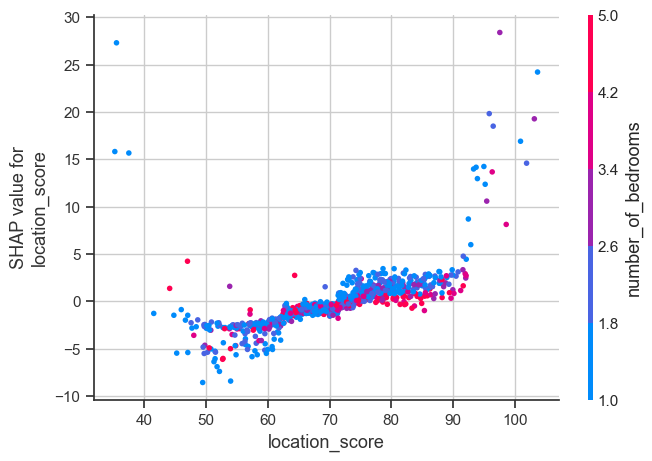

In [137]:
shap.dependence_plot("location_score", shap_values, X_test_fixed)


### CLUSTERING ANALYSIS

In [142]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['nightly_rate', 'number_of_bedrooms', 'guest_capacity', 'amenities_count', 'location_score', 'review_score']
df_cluster = df[features].dropna()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


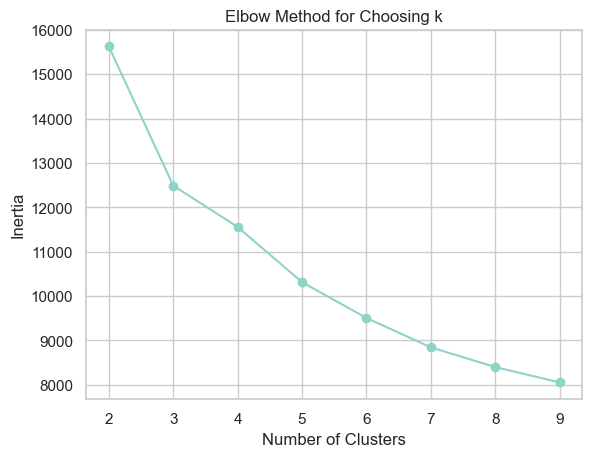

In [144]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing k')
plt.show()


In [146]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df_cluster['cluster'] = cluster_labels


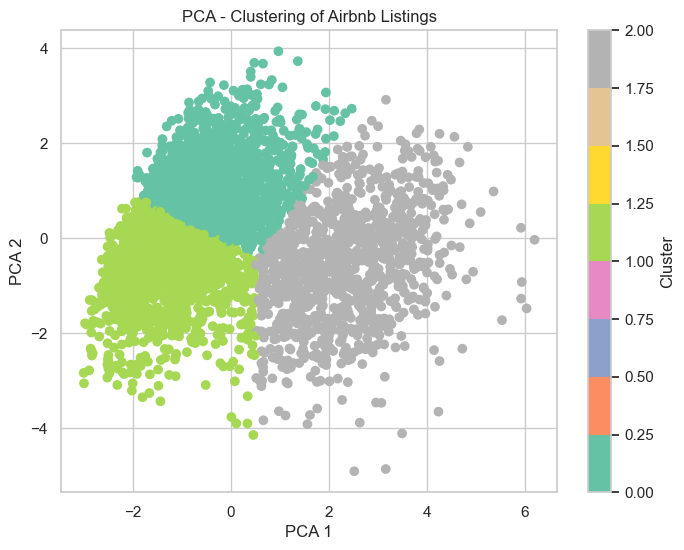

In [148]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Set2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA - Clustering of Airbnb Listings')
plt.colorbar(label='Cluster')
plt.show()


In [150]:
cluster_summary = df_cluster.groupby('cluster').mean()
import pandas as pd
cluster_summary.style.background_gradient(cmap='Blues').format(precision=1)




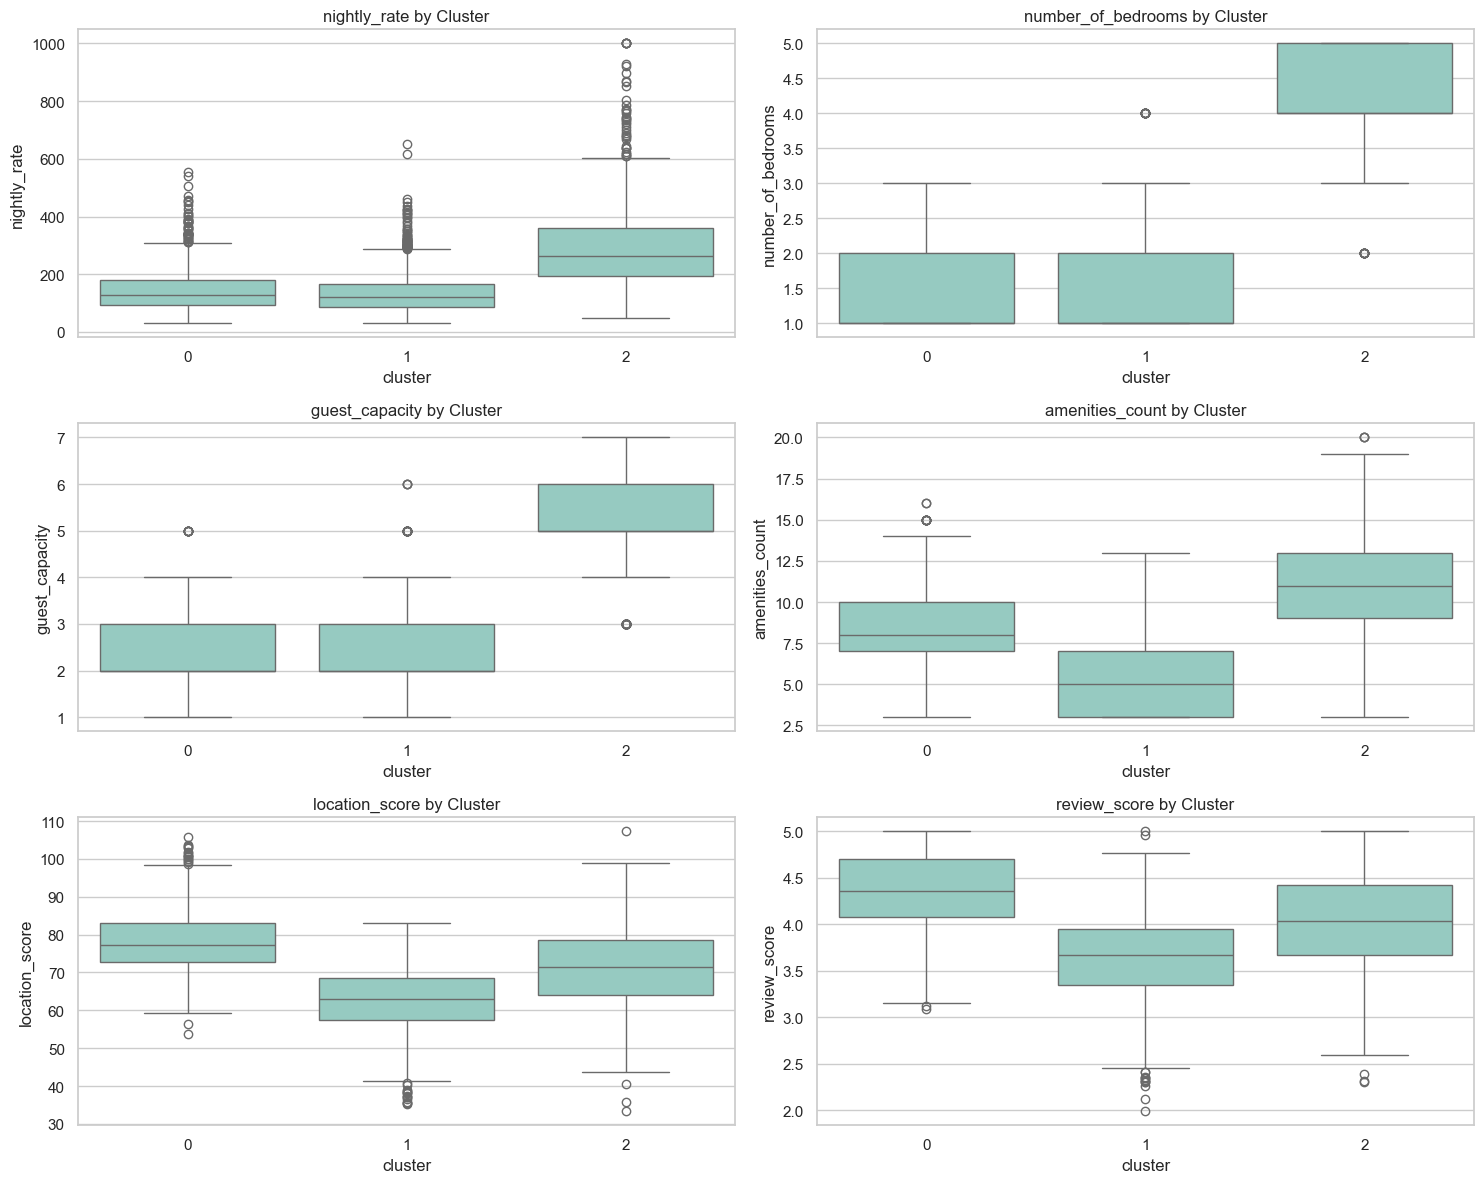

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots for numerical features
numeric_cols = ['nightly_rate', 'number_of_bedrooms', 'guest_capacity', 
                'amenities_count', 'location_score', 'review_score']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df_cluster, x='cluster', y=col)
    plt.title(f'{col} by Cluster')
plt.tight_layout()
plt.show()


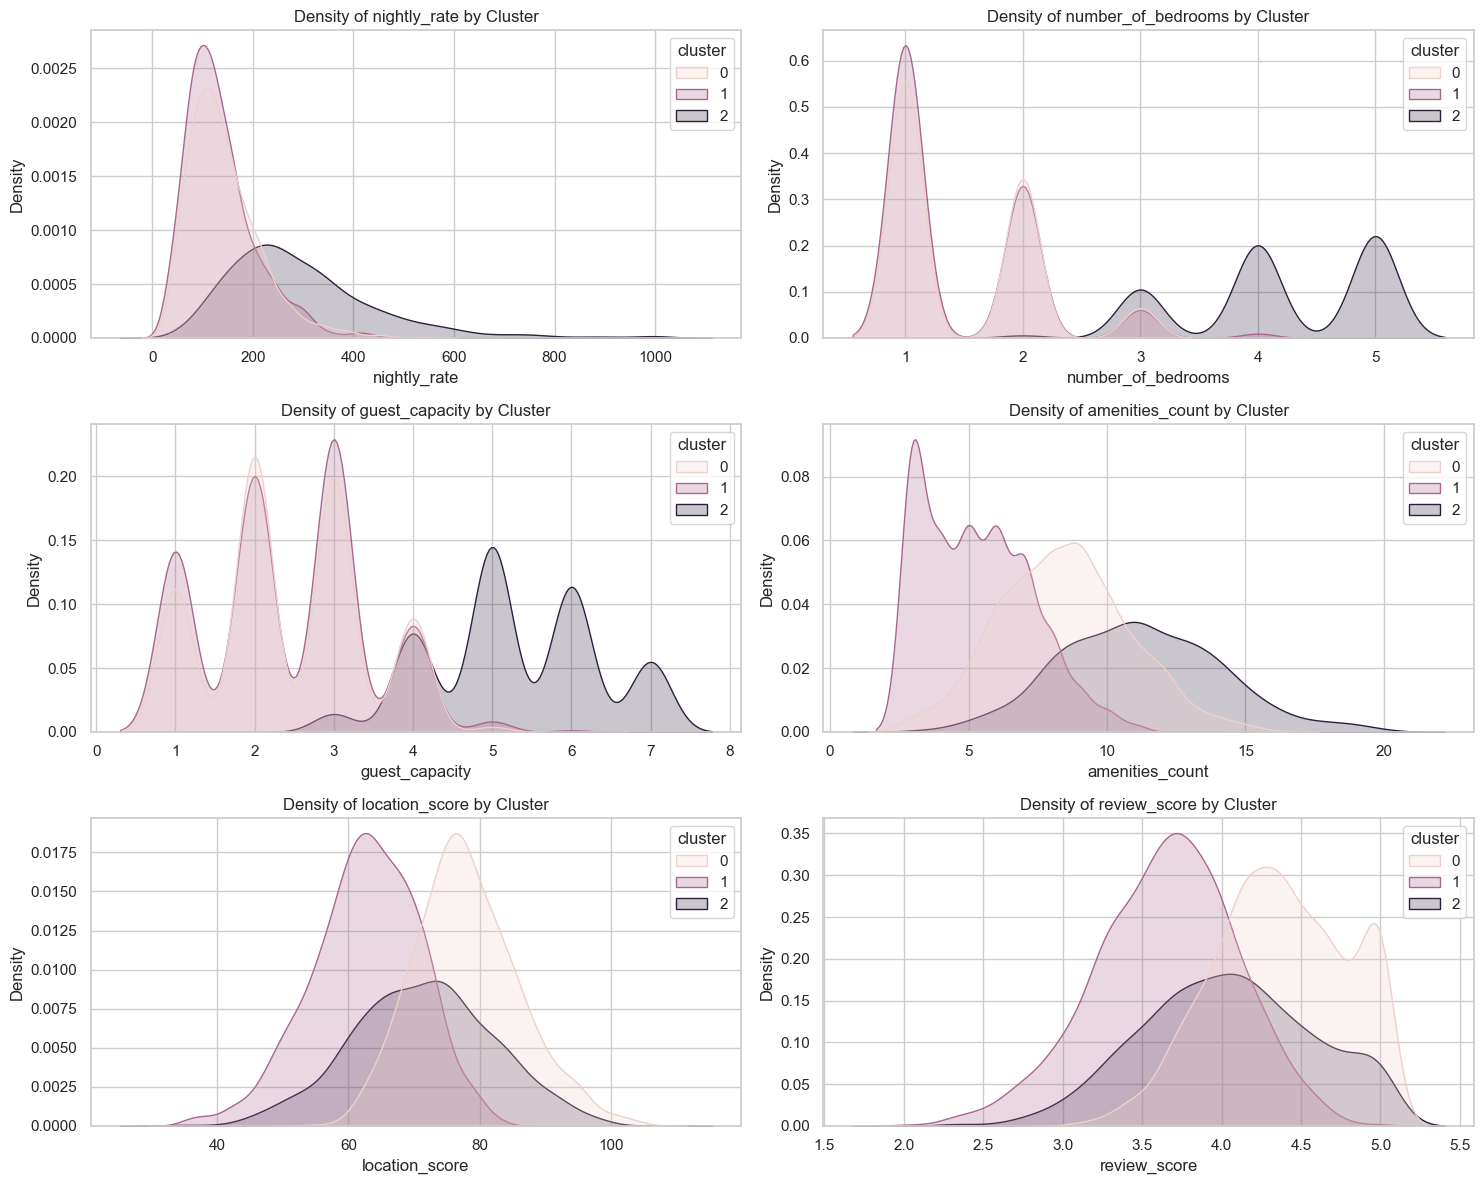

In [154]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df_cluster, x=col, hue='cluster', fill=True)
    plt.title(f'Density of {col} by Cluster')
plt.tight_layout()
plt.show()
